![banner](./images/banner.png "banner")

[Fuente de la imagen](https://unsplash.com/photos/Hcfwew744z4)
<a name='toc' />

# <font color=#ac6240>Predicción de fallo cardíaco con aprendizaje automático supervisado</font>

### <font color=#ac6240>Tabla de Contenidos</font>

<a href=#pre>Requisitos previos</a><br>
1. <a href=#project-description>Descripción del proyecto</a><br>
    1.1 <a href=#project-description-goal>Objetivo</a><br>
    1.2 <a href=#project-description-data>Data</a><br>
    1.3 <a href=#project-description-software>Software</a><br>
2. <a href=#eda>Exploración y visualización de datos</a><br>
    2.1 <a href=#eda-load> Carga de datos</a><br>
    2.2 <a href=#eda-clean>Limpieza de datos</a><br>
    2.3 <a href=#eda-fi> Feature Importance y análisis de la variable target</a><br>
3. <a href=#prep>Preparación de los datos</a><br>
    3.1 <a href=#prep-split> Division de los datos en conjuntos de datos de entrenamiento, validación y prueba</a><br>
    3.2 <a href=#prep-encoding> Codificación de las variables categóricas</a><br>
    3.3 <a href=#prep-scaling> Normalización de las variables numéricas</a><br>
4. <a href=#model>Entrenamiento de modelos</a><br>
    4.1 <a href=#model-LG> Modelo de referencia inicial para la selección de métricas: Regresión Logística </a><br>
    4.2 <a href=#model-DT> Decision Tree (árbol de decisiones) </a><br>
    4.3 <a href=#model-RF> Random Forest (bosque aleatorio) </a><br>
    4.4 <a href=#model-XGB> XGBoost (a gradient-boosted machine) </a><br>
    4.5 <a href=#model-select> Selección del modelo ganador </a><br>
5. <a href=#app>Aplicación del modelo</a><br>
    
<a href=#sol>Soluciones a las preguntas</a><br>

<a href=#next>Siguientes pasos

<a name='pre'/>

## <font color=#ac6240>Requisitos previos</font>

Para comenzar con este jupyter notebook, asumimos que ya estás familiarizadx con Python. Hay toneladas de material gratuito en línea: tutoriales [como éste](https://www.udacity.com/course/introduction-to-python--ud1110), foros [como éste](https://slackin.pyladies.com/) y la [documentación oficial](https://docs.python.org/3/), o simplemente consulta [este breve resumen](https://mlbookcamp.com/article/python).

Usaremos cinco de los paquetes más populares de Python:
+ NumPy, para jugar con números, si no estás familiarizadx con el paquete, consulta [este breve resumen](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/appendix-c-numpy.ipynb)
+ Pandas, para jugar con datos tabulares, si no estás familiarizadx con el paquete, consulta [este breve resumen](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/appendix-d-pandas.ipynb)
+ Scikit-learn, para jugar con modelos de aprendizaje automático, (mostramos cómo aplicar Scikit-learn en este jupyter notebook), y
+ Matplotlib y Seaborn, para visualizar los resultados (utilizamos aplicaciones sencillas en este jupyter notebook).

También asumimos que sabes cómo funcionan los Jupyter Notebooks como este. Si no es así, no te preocupes, es tan fácil como pasar por las celdas y si hay código, hacer clic en la celda y presionar `Enter + Shift` para ejecutarla, el resultado de la celda se mostrará justo debajo. Solo recuerda:
+ ejecuta las celdas de código secuencialmente sin omitir ninguna celda de código, y
+ si saltas de una celda a otra de más arriba y ejecutas esa celda de arriba, has de volver a ejecutar todas las celdas entre medias, no se actualizan automáticamente,
+ las líneas en las celdas de código que comienzan con el símbolo '#' están comentadas, es decir, lo que está después del símbolo sólo es legible por seres humanos y el programa lo ignorará. Elimina el símbolo si está antes de una línea de código que deseas ejecutar
+ los hipervínculos para la navegación del jupyter notebook sólo funcionan cuando el encabezado de la sección de destino correspondiente no está colapsado.

<font size="5"> 👍🤓 </font>

<font size="6"> 🤸🏾‍♀️ </font>  Ya podemos comenzar nuestro proyecto!

<a name='project-description'/>

##  <font color=#ac6240>1. Descripción del proyecto</font>

Este proyecto consiste en una tarea de clasificación que automatizaremos con un modelo de aprendizaje automático con las siguientes características:
+ es una tarea **supervisada**, es decir, el modelo ha de entrenarse con muchos datos, por ejemplo, una hoja de cálculo con 10 columnas y 100000 filas donde, y esto es lo que lo define como aprendimiento supervisado, se conocen los nombres o títulos de las columnas. Una vew entrenado, damos al modelo una nueva fila donde faltan algunos valores y si el entrenamiento fue bueno, el modelo podrá predecir esos datos que faltan
+ a los nuevos datos les falta solamente un valor, el correspondiente a **la columna 'target', el objetivo o destino en inglés, es el valor que intentamos predecir**
+ esa columna puede tener valores discretos (pero no continuos), por lo que **usaremos modelos de clasificación** (y no de regresión)
+ los datos de la columna 'target' solo pueden tomar 2 valores posibles ("sí/no" o "1/0"), por lo que usaremos modelos de **clasificación binaria**
+ si los datos no hubieran sido etiquetados (piensa en una hoja de cálculo sin nombres en el encabezamiento de las columnas), necesitaríamos un modelo de aprendizaje automático no supervisado (es decir, el modelo debe encontrar los grupos o 'clusters' en inglés).

Existen muchos modelos de aprendizaje automático para la clasificación de nuevos datos dado el conocimiento de los datos antiguos. Todos son agnosticos de los datos, es decir, la comunidad de analistas de datos utiliza los mismos modelos independientemente del campo deaplicación (puede ser para detectar si unx paciente sufrirá insuficiencia cardíaca o clasificar qué correos electrónicos son spam, por ejemplo). Calibramos los parámetros del modelo para ajustar el modelo al conjunto de datos determinado. Eso hace que el modelo sea específico para cada objetivo en particular.

Ajustaremos los modelos de clasificación de aprendizaje automático más populares y veremos cuál nos da el mejor rendimiento (también implementaremos otros 3 modelos pero sin calibrar sus parámetros). Para verificar el rendimiento del modelo, separamos aleatoriamente el conjunto de datos en 3 subconjuntos:
+ **un subconjunto de datos para entrenar el modelo**: representan los datos 'antiguos', donde no faltan valores.
+ **un subconjunto de los datos para validar el modelo**: representan datos 'nuevos' porque eliminamos los valores de la columna 'target', pretendemos que no existen, se los damos al modelo y comparamos los resultados del modelo con los valores reales. Como ajustaremos los parámetros para hacer que los resultados del modelo se acerquen cada vez más a los valores reales, el modelo verá este conjunto de datos de validación con mucha frecuencia, lo que puede hacer que el modelo se desvíe (presente sesgo, 'bias' en inglés) hacia el conjunto de datos de validación.
+ **un subconjunto de los datos para probar los resultados del modelo**: la verificación final para comparar los resultados del modelo ajustado con datos que el modelo ajustado nunca ha visto antes; es la mejor manera que tenemos para simular nuevos datos reales. Si los resultados del modelo están más cerca de los valores 'target' reales del conjunto de datos de entrenamiento y validación (es decir, el rendimiento del modelo es excelente después de las fases de entrenamiento y validación) pero las predicciones del modelo que utiliza el conjunto de datos de prueba son muy malas, el modelo se ha sobreajustado ('overfitting' en inglés), es decir, se convirtió en un experto para predecir los datos de entrenamiento y validación pero no puede generalizar su conocimiento (el mayor reto de la inteligencia artificial) y tendremos que aplicar técnicas de regularización avanzadas o buscamos un conjunto de datos más grande (veremos que todo funciona bien y no hara falta para este proyecto).

La mayor parte del trabajo de este proyecto está relacionado con:
+ la preparación de los datos,
+ la selección de la métrica de rendimiento adecuada para comprobar la calidad de las predicciones del modelo,
+ el ajuste de los parámetros del modelo para optimizar esa métrica, y
+ la evaluación del rendimiento del modelo comparando la salida del modelo con los valores reales de la variable objetivo.

Finalmente, no incluimos explicaciones exhaustivas y demostraciones matemáticas (hay muchas otras fuentes, ver la lista de libros a continuación), mejor mencionaremos algunas características intuitivas de los modelos y nos enfocaremos en su implementación en Scikit-learn.

<font color=#6B8E23 size="4"> Lectura adicional </font>
+ [Más de 100 libros gratuitos sobre aprendizaje automático](https://www.theinsaneapp.com/2020/12/download-free-machine-learning-books.html)
+ [_"Grokking Machine Learning"_](https://github.com/luisguiserrano/manning) de Luis Serrano, un libro que te enseña cómo aplicar ML a tus proyectos usando solamente código Python estándar y matemáticas del nivel del insituto de educación secundaria (no lo he leído pero vi muchos [Vídeos de Luis Serrano](https://www.youtube.com/c/LuisSerrano) en Youtube, son geniales).

<a name='project-description-goal'/>

### <font color=#ac6240>1.1 Objetivo</font>

El objetivo es predecir una insuficiencia cardíaca en lxs pacientes conociendo si padecen dolor en el pecho, nivel alto de colesterol, nivel alto de azúcar en sangre, ... y otras características consideradas factores de riesgo en la detección de enfermedades cardiovasculares. Las conclusiones de este análisis pueden ayudar en la detección temprana, el diseño de campañas de prevención y la comprensión de diagnósticos controvertidos.

<a name='project-description-data'/>

### <font color=#ac6240>1.2 Datos</font>

El conjunto de datos que usamos para entrenar nuestro modelo está disponible en la base de datos de Kaggle: [Conjunto de datos de predicción de insuficiencia cardíaca de Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction) (cita: fedesoriano. (Septiembre de 2021) Heart Failure Prediction Dataset). Aquí ya hemos descargado el fichero con extension  `.csv` en la misma carpeta donde esta este Jupyter notebook.

El variable 'target', es decir, lo que queremos predecir, se llama "HeartDisease", y es una variable binaria que toma los valores:
+ 1: sí, pacientes que sí presentan riesgo de padecer una cardiopatía
+ 0: no, pacientes que no presentan riesgo de padecer una cardiopatía

Usamos los datos de lxs pacientes en el conjunto de datos para predecir la probabilidad de que nuevxs pacientes sufran una insuficiencia cardíaca, es decir, conociendo las características médicas de unx nuevx paciente, el modelo clasificará si tiene riesgo de sufrir una insuficiencia cardíaca o no. 

Las características del conjunto de datos se encuentran en la siguiente lista. Muchos son fáciles de entender, mientras que otros están destinados a expertxs. Como dijimos anteriormente, los modelos de aprendizaje automático que se utilizan aquí son independientes de los datos (data agnostic). Entonces, realmente no necesitamos entender qué significa exactamente cada característica, porque lo que nos importan son las relaciones numéricas.
+ Edad: edad de lxs pacientes (años)
+ Sexo: sexo de lxs pacientes (M: Masculino, F: Femenino)
+ Tipo de dolor de pecho: TA: angina típica, ATA: angina atípica, NAP: dolor no anginal, ASY: asintomático
+ BP en reposo: presión arterial en reposo (mm Hg)
+ Colesterol: colesterol sérico (mm/dl)
+ BS en ayunas: azúcar en sangre en ayunas (1: si BS en ayunas> 120 mg/dl, 0: en caso contrario)
+ ECG en reposo: resultados del electrocardiograma en reposo: Normal, ST (con anomalía de la onda ST-T), T (inversiones de onda y/o elevación o depresión del ST> 0,05 mV), HVI (que muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes)
+ MaxHR: frecuencia cardíaca máxima alcanzada (valor numérico entre 60 y 202)
+ ExerciseAngina: angina inducida por el ejercicio (Y: Sí, N: No)
+ Oldpeak: oldpeak = ST (Valor numérico medido en depresión)
+ ST_Slope: la pendiente del segmento ST del ejercicio pico (UP: ascendente, Flat: plano, Down: descendente)

Como decíamos, la comunidad de analistas de datos no necesita ser en experta en medicina para analizar los datos, pero debe verificar las suposiciones y trabajar en colaboración con profesionales de la medicina, porque son quienes realmente pueden tomar las decisiones correctas.

![ivory](./images/ivory_small.png "ivory")

[Fuente de la imagen](https://koaning.io/posts/mean-squared-terror/)

<a name='project-description-software'/>

### <font color=#ac6240>1.3 Software</font>

Usaremos estas librerias:

In [1]:
import pandas as pd     
import numpy as np

# data exploration and preparation  
from sklearn.metrics import mutual_info_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import StandardScaler 

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# model evaluation
from sklearn.metrics import accuracy_score, f1_score, auc, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


# plotting and displaying in the notebook
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import graphviz
from sklearn import tree
import emoji

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<a href=#toc>Subir a la Tabla de Contenidos</a><br>

<a name='eda' />

## <font color=#ac6240>2. Exploración y visualización de datos</font>

<a name='eda-load'/>

### <font color=#ac6240>2.1 Carga de datos</font>

Vamos a cargar los datos del fichero `heart_failure.csv`:

In [2]:
df = pd.read_csv("heart_failure.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Vemos que el conjunto de datos es pequeño, comprende 918 pacientes, sus 11 características médicas y la variable objetivo 'target', es decir, si padecen una enfermedad cardíaca o no.

Los modelos de aprendizaje automático son más precisos cuanto más datos usamos para entrenarlos y este conjunto de datos puede ser demasiado pequeño para conseguir un gran rendimiento. Comprobemos eso.

En las siguientes subsecciones limpiamos y preparamos los datos porque queremos entrenar el modelo con la mejor información. Los datos pueden estar etiquetados incorrectamente, presentar errores tipográficos, .... Además, es posible que los modelos no acepten valores faltantes (como 'null' o [NaN](https://en.wikipedia.org/wiki/NaN)) o ciertos tipos de datos o puede que no converjan si los datos no están normalizados. Finalmente, queremos que los modelos separen la información relevante que las personas no podemos inferir, por lo tanto, podemos usar la información que sí inferimos simplemente (como corregir errores tipográficos ...) para ayudarlos (y ahorrar tiempo y energía).

<font color=#6B8E23 size="4">Lectura adicional</font>
+ Por qué el preprocesamiento de datos es técnica pero también éticamente importante: ['How to constrain artificial stupidity'](https://www.youtube.com/watch?v=Z8MEFI7ZJlA&t=222s) especialmente del minuto 12:48 al 22:44 ([diapositivas](https://koaning.io/theme/notebooks/artificial-stupidity.pdf) 39-57)

<a name='eda-clean'/>

### <font color=#ac6240>2.2 Limpieza de datos</font>

#### <font color=#ac6240>Valores faltantes y data types</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


No se detectan valores faltantes en el conjunto de datos. Eso significa que no están representados por 'NaN' en el conjunto de datos, pero a menudo se usan otros valores para la información faltante como 'desconocido', 'unknown', '?', '9999', ... y vamos estar atentxs a esto.

Con respecto a los tipos de datos, parece que 'FastingBS' (la presión sanguínea en ayunas) debería ser una variable categórica ya que los valores actuales de 0 y 1 son solamente representaciones de valores cualitativos que no queremos que el modelo interprete como valores cuantitativos.

In [4]:
# Transform the categorical values wrongly classified as numericals
new_values = {
    0: 'L', # low
    1: 'H', # high
}

df.FastingBS = df.FastingBS.map(new_values)
# type(df.FastingBS[0]) # uncomment to check that it is a string type

In [5]:
# Store in different lists the names of the categorical and numerical columns since they will be treated different 
categorical = df.select_dtypes(include=['object']).columns.tolist()  # for strings 
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist() # for numbers

#### <font color=#ac6240>Duplicados</font>

In [6]:
df.duplicated().count() 

918

El método `duplicated()` da 'False' si la fila no está duplicada y el método `count()` solo cuenta los valores 'True', ya que hay 918 valores verdaderos en 918 filas , no hay filas duplicadas (en la página de Kaggle del conjunto de datos se dice que los duplicados ya se eliminaron).

#### <font color=#ac6240>Rangos y estadística básica</fonts>

In [7]:
# Check the stats of numerical features
df.describe(include = np.number).round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89,0.55
std,9.43,18.51,109.38,25.46,1.07,0.50
min,28.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,120.00,0.00,0.00
50%,54.00,130.00,223.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,156.00,1.50,1.00
max,77.00,200.00,603.00,202.00,6.20,1.00


Las diferentes columnas muestran un rango de valores muy diferente, necesitaremos normalizar (ver la sección <a href=#prep>3. Preparación de datos</a>).

Los valores mínimos de 'RestingBP' y 'Cholesterol' son cero, lo cual es sospechoso. Veamos cuántas filas presentan valores cero en las características:

In [8]:
df[df == 0].count()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
HeartDisease      410
dtype: int64

Con experiencia en el campo de la medicina, podríamos decidir si reemplazar estos valores nulos por la media u otro valor. Carecemos de esta información, por lo tanto, simplemente eliminamos esas filas.

In [9]:
index_to_drop = list(df.loc[(df.RestingBP == 0) | (df.Cholesterol == 0)].index)
df.drop(index_to_drop, inplace=True)

In [10]:
# Check the stats of categorical features
df.describe(include='object')

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,746,746,746,746,746,746
unique,2,4,2,3,2,3
top,M,ASY,L,Normal,N,Flat
freq,564,370,621,445,459,354


Todas las características presentan la cantidad de valores únicos descritos en la sección <a href=#project-description-data>Data</a>, por lo que parece que no hay errores tipográficos obvios.

In [11]:
df.shape

(746, 12)

El conjunto de datos no está muy balanceado en las características 'FastingBS' y 'Sex' (hay muchxs pacientes con baja presión saguínea en ayunas y hay muchos más hombres que mujeres).

In [12]:
print('percentage FastingBS')
print(df.FastingBS.value_counts(normalize=True).round(4)*100)

percentage FastingBS
L    83.24
H    16.76
Name: FastingBS, dtype: float64


In [13]:
print('percentage Sex')
print(df.Sex.value_counts(normalize=True).round(4)*100)

percentage Sex
M    75.6
F    24.4
Name: Sex, dtype: float64


#### <font color=#ac6240>Valores únicos</font>

El método `describe()` ya mostraba los valores únicos para las variables categóricas. Comprobamos ahora los valores únicos de las características numéricas.

In [14]:
for column in numerical:
  print(f"{column} has {df[column].nunique()} unique values.")

Age has 49 unique values.
RestingBP has 63 unique values.
Cholesterol has 221 unique values.
MaxHR has 109 unique values.
Oldpeak has 43 unique values.
HeartDisease has 2 unique values.


<font size ='5'> ✌️ </font>Parece que no hay necesidad de más limpieza de datos.

<a name='eda-fi'/>

### <font color=#ac6240>2.3 Feature importance y analisis de la variable 'target'</font>

Intentaremos identificar qué características o 'features' afectan a la variable obejtivo o de destino 'HeartDisease', también conocida como 'target'.

#### <font color=#ac6240>2.3.1 Variables numéricas</font>

#### 2.3.1.1 Pair plots para detectar visualmente valoes atípicos y potenciales relaciones entre variables

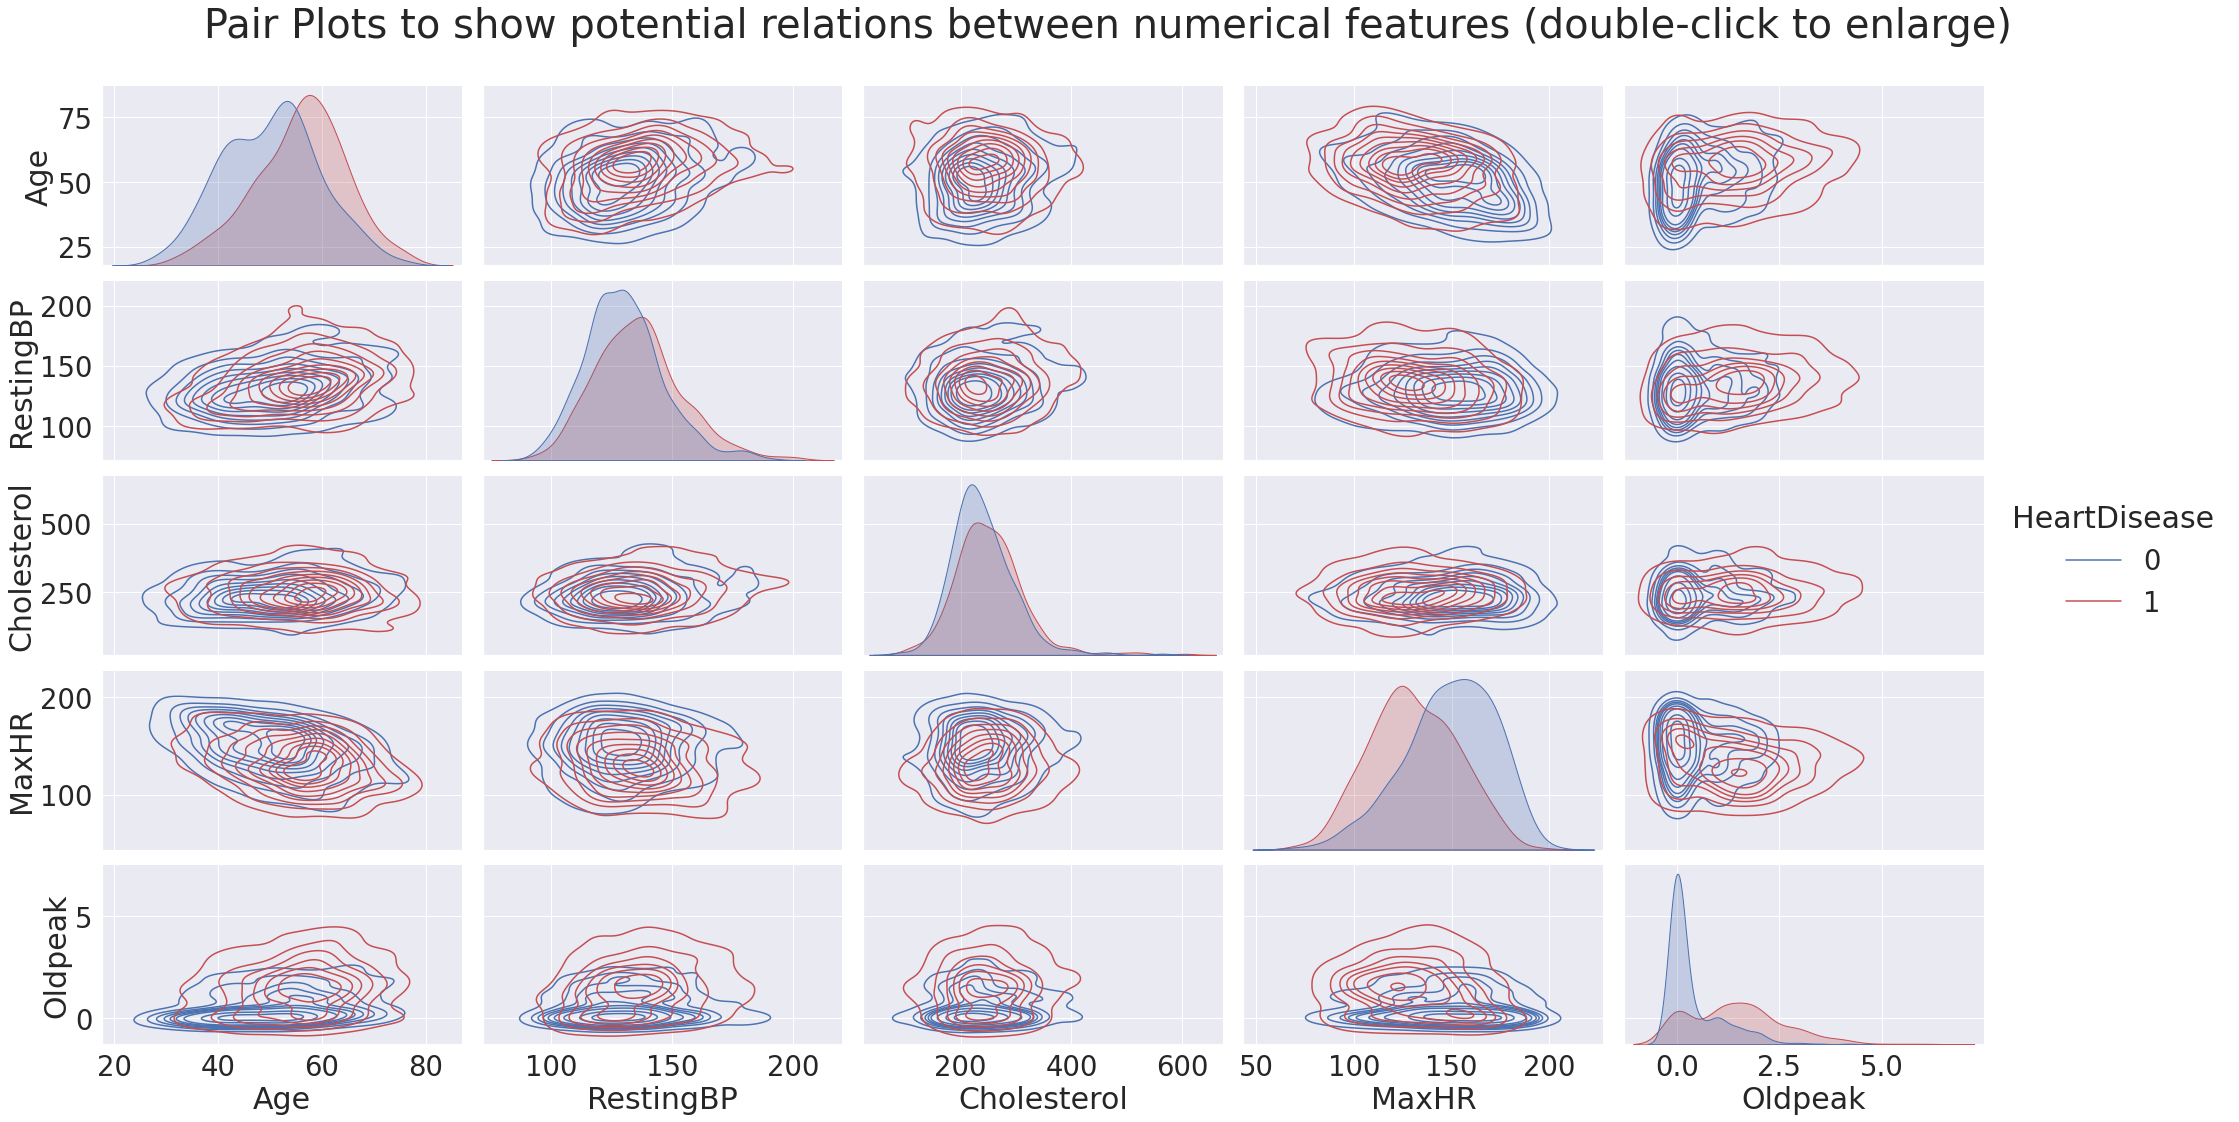

In [15]:
# This visualization takes a while, set the 'if' as "True" to run it
if True:#False: 
    colors = ["b","r"]
    hue_order = [0, 1]
    sns.set(font_scale = 2.5)
    
    ax = sns.pairplot(df, hue='HeartDisease', palette=colors, hue_order=hue_order, height=3, aspect = 1.9,
                      kind="kde") #, markers=["o", "s", "D"]
    ax.fig.suptitle('Pair Plots to show potential relations between numerical features (double-click to enlarge)',
                size=40, ha='center', y = 1.05)
    plt.show()

No se ven relaciones obvias en los gráficos. Lxs pacientes que padecen cardiopatías (en rojo) presentan con mayor frecuencia valores altos de 'Oldpeak' y una media más baja de la distribución de 'MaxHR'. Parecen ser características relevantes para la predicción 'HeartDisease'.

Los diagramas de pares también son útiles para detectar valores atípicos. Trazamos aquí los gráficos de contorno de las funciones de densidad. Solamente un par de valores de 'RestingBP' parecen apartarse de los grupos. Como veremos, el rendimiento del modelo es aceptable sin aplicar más técnicas de detección o eliminación.

<font color=#6B8E23 size="4"> Lectura adicional </font>
+ [Example of outlier detection](https://koaning.io/posts/outliers-selection-vs-detection/)

#### 2.3.1.2. Distribución de frecuencias

La diagonal de los gráficos de pares anteriores muestra la distribución de frecuencia de las características numéricas separadas por su valor 'HeartDisease'. Trazamos el histograma de la variable de destino 'HeartDisease':

Text(0.5, 1.0, 'Target distribution')

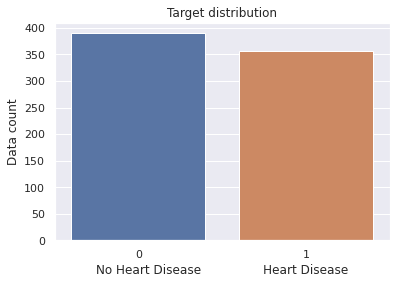

In [16]:
#Checking for data imbalance in the target
sns.set(font_scale = 1)
sns.countplot(x="HeartDisease", data=df).set(ylabel = "Data count"
            , xlabel = "No Heart Disease                Heart Disease")
plt.title('Target distribution')

La variable 'target' está bastante balanceada, no necesitamos muestrear (también llamado 'resampling') el conjunto de datos aplicando por ejemplo 'bootstrapping' (es decir, creando aleatoriamente un subgrupo de datos con el mismo numero de casos de riesgo que sin riesgo).

#### 2.3.1.3. Correlación

Usamos el [coeficiente de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). Es importante notar que correlación no implica causalidad, porque muchas correlaciones son espúreas. Diseñar los modelos de aprendizaje automático que comprendan qué correlación es falsa y cuál es legítima, o si eso es posible, es un tema candente en la comunidad de ciencia de datos. Volveremos a este tema importante en la sección <a href=#model-LG> 4.1 Modelo de referencia inicial para la selección de métricas: Regresión logística </a>.

<font color=#6B8E23 size="4">Lectura adicional</font>
+ [Ejemplos de correlaciones espúreas divertidas](http://www.tylervigen.com/spurious-correlations)

In [17]:
matrix_corr = df.corr().round(3)

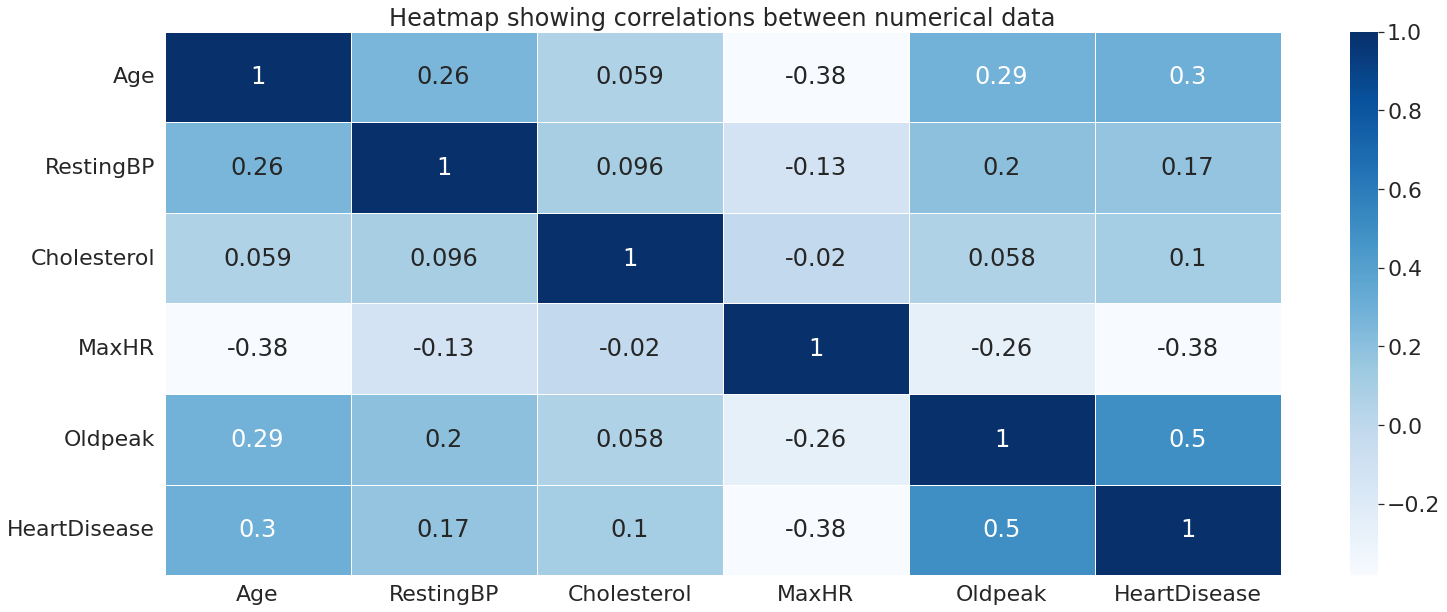

In [18]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)

sns.heatmap(matrix_corr,annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show() 

Las correlaciones positivas más altas con el objetivo 'HeartDisease' son con 'Oldpeak' y la correlación negativa más alta es con 'MaxHR', en consonancia con los gráficos de pares anteriores.

#### 2.3.1.4 ROC AUC

La [ROC AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) es una métrica para evaluar el rendimiento de un modelo (analizaremos las métricas más comunes, incluyendo ROC AUC en la sección <a href=#model-metric>4.1.1 Selección de la Métrica</a>). También se puede usar para ordenar la importancia de las características en general (sin tener aún ningún modelo), que es lo que nos concierne en esta sección. Utilizada con este fin, la ROC AUC nos dice qué características ('Age', 'Cholesterol', ..) de lxs pacientes con 'HeartDisease' igual a '1' tienen valores más altos que los de lxs pacientes sin riesgo de sufrir insuficiencia cardíaca ('HeartDisease' igual a '0').

Hablaremos de nuevo sobre ROC AUC en la sección <a href=#model-metric>4.1.1 Selección de la Métrica</a> como métrica y no para evaluar la importancia de una característica.

In [19]:
feature_scores = []

for col in numerical:       
    auc = roc_auc_score(df.HeartDisease, df[col]) 
    if auc < 0.5: # in case the feature is negatively correlated with the target
        auc = roc_auc_score(df.HeartDisease, -df[col]) 
    feature_scores.append((col, auc))

columns = ['feature', 'ROC_AUC']
df_scores = pd.DataFrame(feature_scores, columns=columns)
df_scores.sort_values(by=['ROC_AUC'],ascending=False).reset_index(drop = True)

,feature,ROC_AUC
0,HeartDisease,1.000000
1,Oldpeak,0.779840
2,MaxHR,0.722458
3,Age,0.677355
4,RestingBP,0.602222
5,Cholesterol,0.566404


Nuevamente, 'Oldpeak' y 'MaxHR' parecen ser importantes en la detección de positivo en 'HeartDisease'.

#### <font color=#ac6240>2.3.2 Categorical variables</font>

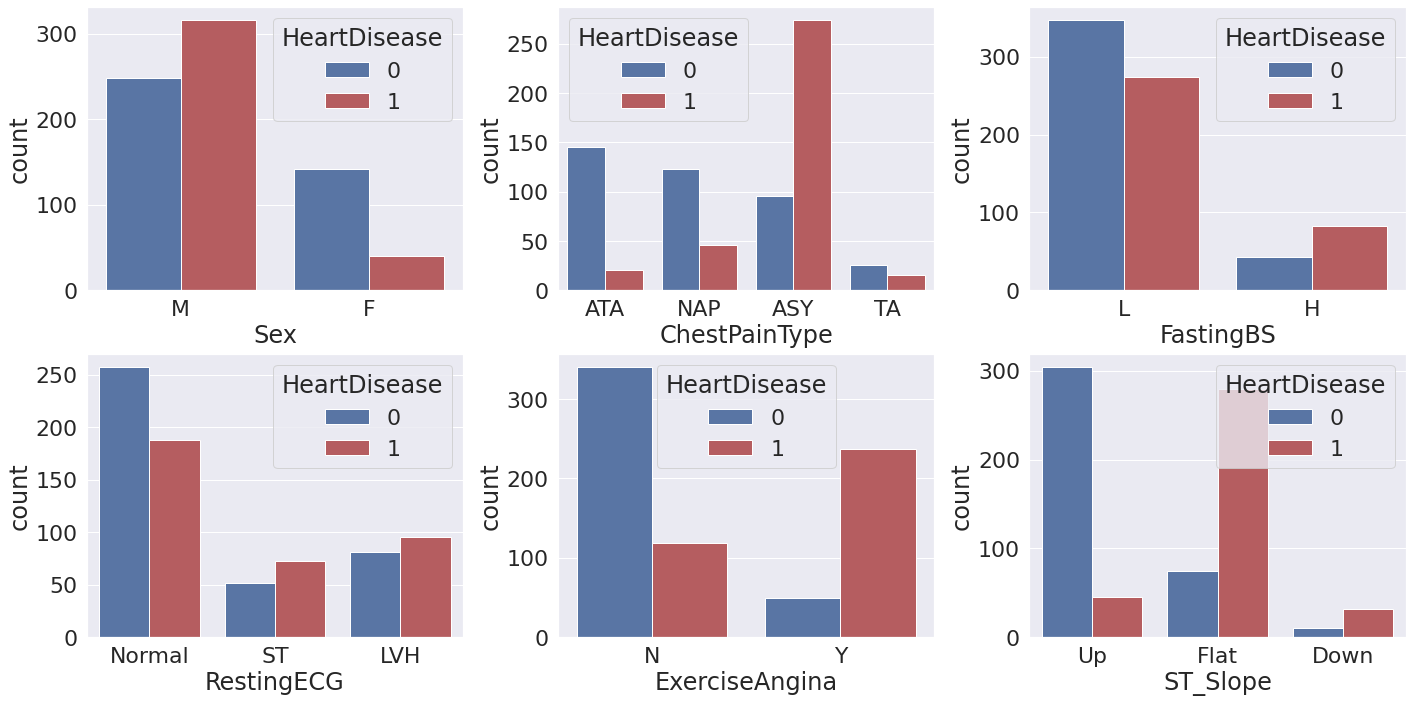

In [20]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
sns.set(font_scale = 2)
plt.tight_layout()

colors = ["b","r"]
for indx, (column, axes) in list(enumerate(list(zip(categorical, ax.flatten())))):
    sns.countplot(ax = axes, x = df[column], hue = df['HeartDisease'], palette = colors, alpha = 1)  

plt.show()

'ChestPain ASY', 'ExerciseAngina' y los valores 'UP' y 'Flat' de la función 'ST_Slope' parecen ser muy relevantes para determinar la insuficiencia cardíaca. El 'Sexo' también es una característica relevante, mientras que 'FastingBS' y 'RestingECG' solo parecen ser significativos para pacientes con valores 'L' y 'Normal', respectivamente.

#### 2.3.2.1 Mutual Information

Usamos la función `mutual _info_ score`, viene de la [teoría de la información](https://en.wikipedia.org/wiki/Mutual_information), para variables categóricas, y nos dice cuánto podemos aprender sobre una variable (en este caso, 'HeartDisease') si conocemos el valor de otra (en este caso, cada una de nuestras características).

In [21]:
def mut_inf_score(series):
    return mutual_info_score(series, df.HeartDisease)

# apply the function column-wise
MutInf = df[categorical].apply(mut_inf_score)
MutInf.sort_values(ascending=False) # to sort it

ST_Slope          0.234459
ExerciseAngina    0.162059
ChestPainType     0.154961
Sex               0.045094
FastingBS         0.013019
RestingECG        0.009284
dtype: float64

#### <font color=#ac6240>2.3.3 Feature importance: conclusión</font>

Las correlaciones más altas en las características numéricas son 'Oldpeak, y 'MaxHR' y 'ST_Slope', 'ExerciseAngina' y 'ChestPainType' parecen ser las características categóricas más relevantes.

Entrenaremos diferentes modelos durante la fase de entrenamiento (ver apartado <a href=#model>4. Entrenamiento del modelo</a>) para seleccionar el que mejor se desempeñe nuestra tarea. Cada modelo usa los datos a su modo. Podríamos verificar programáticamente el efecto de eliminar características en el rendimiento del modelo de cada uno de los modelos que entrenaremos. Si la presencia o eliminación de una característica no afecta los resultados, la característica no es relevante para ese modelo y podemos descartarla al ajustar los parámetros del modelo y para las fases de validación y prueba. Además, podríamos buscar características polinómicas que muestren colinealidades o aplicar métodos de reducción de dimensionalidad (Linear Discriminant Analisys, Principal Component Analysis,...). Veremos a continuación que el modelo de referencia inicial ya funciona razonablemente bien sin hacer feature engineering. Simplemente codificaremos las características categóricas y normalizaremos (ver la siguiente sección <a href=#prep>3. Preparación de datos</a>).

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<a name='prep'/>

## <font color=#ac6240>3. Preparación de los datos</font>

<a name='prep-split'/>

### <font color=#ac6240>3.1 División de los datos en conjuntos de datos de entrenamiento, validación y prueba</font>

En esta división aleatoria, y en todas las ocasiones siguientes en las que usemos un generador de números aleatorios, fijamos la semilla del generador de números aleatorios para asegurar la reproducibilidad de los resultados. Fijamos el `random_state = 1` pero podría ser 2 o cualquier otro valor, no afectará a los resultados, pero con esta corrección siempre obtendremos exactamente los mismos resultados.

In [22]:
# copy the original dataframe so further manipulations will not affect it 
df_select = df.copy() 
categorical = df_select.select_dtypes(include=['object']).columns.tolist()
numerical = df_select.select_dtypes(include=['int64','float64']).columns.tolist()
numerical.remove('HeartDisease')

In [23]:
# separate train + validation (= full) and test
df_full_train, df_test = train_test_split(df_select, test_size=0.2, random_state=1)
# now split the full into train and val, it should be the 20% of the 80%, which is 20/80=1/4=0.25
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 
len(df_train), len(df_val), len(df_test)

(447, 149, 150)

In [24]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

# separate the target
y_train = df_train.HeartDisease.values
y_val = df_val.HeartDisease.values

# remove the target from the features
del df_train['HeartDisease']
del df_val['HeartDisease']

<a name='prep-encoding'/>

### <font color=#ac6240>3.2 Codificación de las variables categóricas</font>

Usamos Scikit-Learn `DictVectorizer` para codificar características categóricas (toma un diccionario y lo convierte en un vector, es decir, en un` numpy.array`). Es un método de los llamados One-Hot Encoding (OHE) para convertir las características categóricas (no afectaría las numéricas) en columnas con valores binarios, con tantas columnas como valores tome la variable categórica. Como veremos a continuación, esta codificación proporciona un buen rendimiento del modelo de referencia inicial ('baseline model'), por lo que no exploramos los efectos de otros algoritmos de codificación, como `LabelEncoder`, `OneHotEncoder` o la función `get_dummies()`, por ejemplo.

In [25]:
dv = DictVectorizer(sparse=False) # False bcs is not a sparse matrix (we do not have many zeros)

# TRAIN
train_dict = df_train[categorical].to_dict(orient='records') # records = to do it row-wise, not col-wise
X_train_cat = dv.fit_transform(train_dict) # make it a vector

# VAL
val_dict = df_val[categorical].to_dict(orient='records')
X_val_cat = dv.transform(val_dict)

Ahora bien, nuestro dataframe de las 'features' categóricas tiene información redundante. Por ejemplo, la columna de la caracteristíca 'ExcerciseAngina' que podía tener valores 'N' o 'Y' ahora dió lugar a dos columnas, una llamada 'ExcerciseAngina=N' y otra 'ExcerciseAngina=Y' que claramente no son independientes y están totalmente correlacionadas, miremos por ejemplo, el conjunto de entrenamiento:

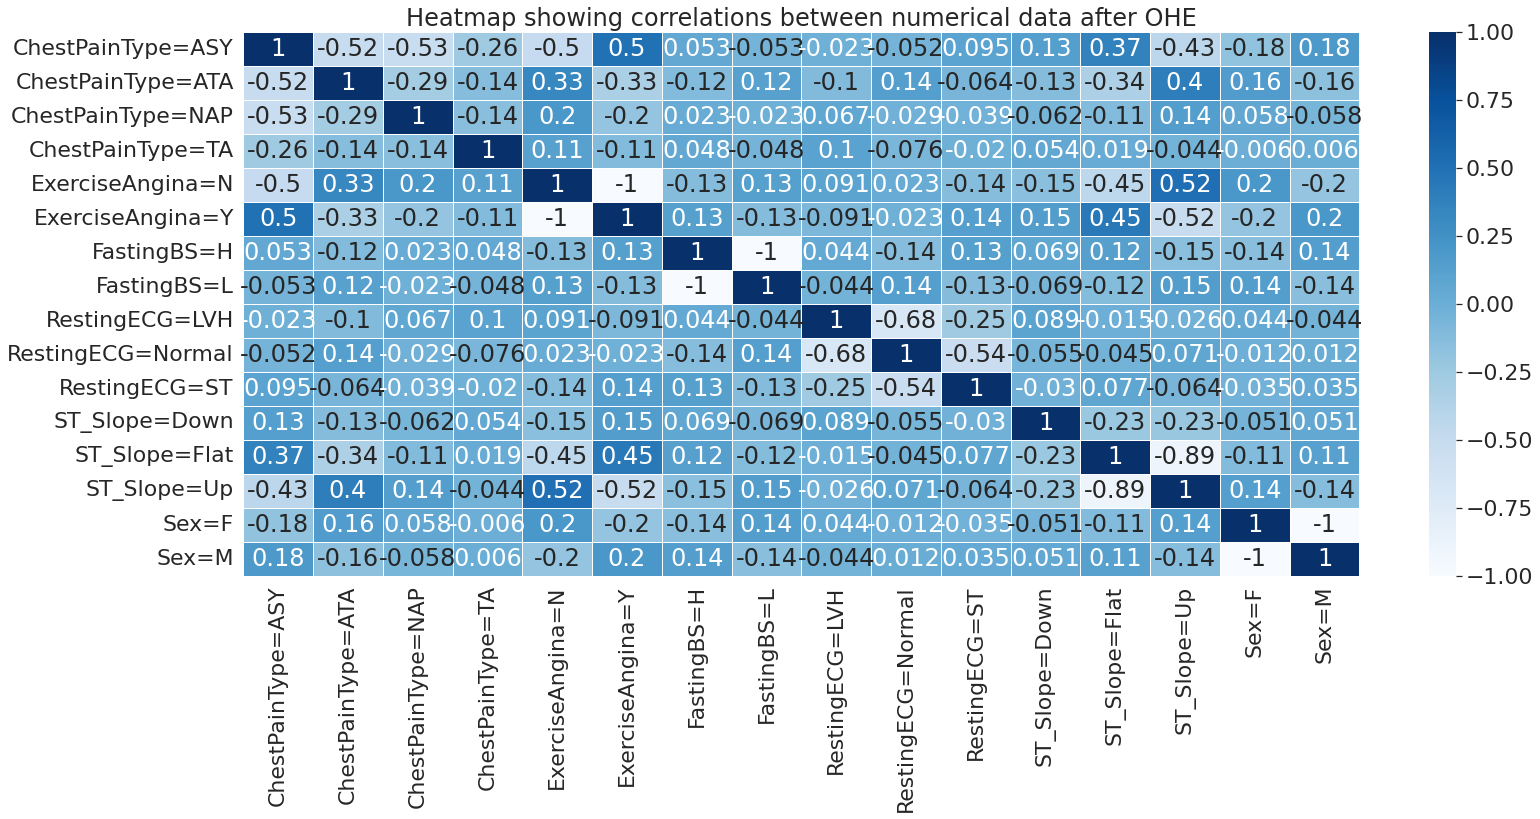

In [26]:
# convert de data array to a dataframe
df_X_train_cat = pd.DataFrame(X_train_cat,columns= dv.get_feature_names())

# correlation
matrix_corr = df_X_train_cat.corr().round(3)
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)

sns.heatmap(matrix_corr,annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data after OHE')
plt.show() 

Hemos de eliminar la información redundante del conjunto de entrenamiento. Las 'features' con correlación igual a 1 o -1 dan la misma información. Aquellas con correlación ~0.9 tampoco aportan nada nuevo. Eliminamos una de las columnas de cada par correlacionado (da igual qué columna de cada par eliminemos, ambas dan la misma información):

In [27]:
df_X_train_cat.drop(['ExerciseAngina=N', 'FastingBS=H', 'Sex=F', 'ST_Slope=Up'], 
                    axis=1, inplace=True)

Pasamos los datos a una `numpy_array` que es formato que necesitaremos a continuacion:

In [28]:
X_train_cat = df_X_train_cat.to_numpy()

Hacemos lo mismo con el conjunto de validación:

In [29]:
# convert the data array to a dataframe
df_X_val_cat = pd.DataFrame(X_val_cat,columns= dv.get_feature_names())

# remove redundant columns
df_X_val_cat.drop(['ExerciseAngina=N', 'FastingBS=H', 'Sex=F', 'ST_Slope=Up'], 
                    axis=1, inplace=True)

# convert the dataframe to a np.array again
X_val_cat = df_X_val_cat.to_numpy()

y los nombres de las columnas con 'features' categoricas que ha sido codificadas son:

In [30]:
categorical_update = df_X_train_cat.columns.to_list()

<a name='prep-scaling'/>

###  <font color=#ac6240>3.3 Normalización de las variables numéricas</font>

Usamos Scikit-Learn `StandardScaler` para normalizar las características numéricas (de lo contrario, las columnas con valores en un rango más alto tendrían más representación y el modelo no converge). Como veremos a continuación, esto proporciona un rendimiento razonable para el modelo de referencia inicial, por lo tanto, no exploramos los efectos de otros algoritmos de estandarización, como `MixMaxScaler`, por ejemplo).

In [31]:
scaler = StandardScaler()

# TRAIN
X_train_num = df_train[numerical].values
X_train_num = scaler.fit_transform(X_train_num)

# VAL
X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

Unimos las matrices numéricas y categóricas:

In [32]:
# TRAIN
X_train = np.column_stack([X_train_num, X_train_cat])

# VAL
X_val = np.column_stack([X_val_num, X_val_cat])

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<a name='model'/>

## <font color=#ac6240>4. Entrenamiento de los modelos</font>

Vamos a analizar 4 modelos de aprendizaje supervisado:
+ regresión logística ('Logistic Regression'),
+ árbol de decisiones ('Decision Tree'), 
+ bosque aleatorio ('Random Forest'), y
+ máquina de aumento de gradiente (o 'XGBoost')

que son los clasificadores de aprendizaje automático más populares (ver, por ejemplo, [Kaggle 2021](https://storage.googleapis.com/kaggle-media/surveys/Kaggle's%20State%20of%20Machine%20Learning%20and%20Data%20Science%202021.pdf) página 32). 

Tunearemos y entrenameros estos modelos y en la sección <a href=#model-select>4.5 Selección del modelo ganador</a> seleccionaremos el modelo que mejor a desempeñado la tarea de clasificaion de la variable objetivo 'HeartDisease' segun varias métricas de rendimiento que se explicarán en detalle a continuación.

<a name='model-LG'/>

### <font color=#ac6240>4.1 Modelo de referencia inicial para la selección de la métrica: Regresión Logística</font>

#### <font color=#ac6240>Recordemos la regresión lineal</font>

Es posible que hayas utilizado una regresión lineal antes: dada una tabla con columnas `x` e` y` que podríamos representar en los ejes `x` e` y` como un grupo de puntos `(x, y)`, buscamos los parámetros `m` y `n` que hacen una línea `y = mx + n` lo más cercana posible a _todos_ los puntos minimizando la distancia (generalmente medida con el error cuadrático) desde dicha línea a _todos_ los puntos. Entonces, el modelo de regresión lineal asume esta relación _lineal_ `y = mx + n` entre la variable 'feature' `x` y la variable 'target' `y`, calcula los valores de los parámetros ` m` y `n`, cuando llega un nuevo dato `x`, podemos predecir su correspondiente `y` multiplicando el parámetro `m` por esa nueva` x` y agregando `n`.  

La regresión lineal que aplicamos en aprendizaje automático es muy parecida. Sólo que en lugar de calcular `m` y `n` con las ecuaciones denominadas 'normales' que resultan de minimizar la distancia por el método de los 'mínimos cuadrados', se puede demostrar que para grandes conjuntos de datos (Big Data) es más rápido:
+ seleccionar aleatoriamente un subgrupo de puntos,
+ para cada punto, calcular su distancia a la línea y añadir a los valores preliminares de `m` y `n` una cantidad proporcional a esa distancia para acercar la línea a ese punto,
+ para que no haya grandes saltos y el proceso converga rápidamente, se fija la llamada 'tasa de aprendizaje' o 'learning rate', que es un número pequeño (es común que valga 0.01) que multiplica a esa cantidad proporcional, y
+ se repite el proceso del cálculo y la minimización sobre todo el subgrupo varias veces, y cada vez se denomina 'época' (es común tener 1000 épocas). 

Este maravilloso [Vídeo de Luis Serrano](https://youtu.be/wYPUhge9w5c) lo explica visualmente. Parámetros como el número épocas o la tase de aprendizaje se llaman _hiperparámetros_ porque son parámetros del algoritmo, la parte computacional del proceso, y no de la parte matemática del proceso. En nuestro caso no queremos predecir el valor de la variable de destino `y` a partir de los datos de diferentes valores de `x` si no que queremos clasificar nuevos valores de la variable de destino `y` por eso directamente aplicaremos la regresión logística y no la lineal.

#### <font color=#ac6240>Regresión Logística</font>

Una regresión logística se usa para clasificar, es decir separar datos (en nuestro caso, lxs pacientes) en categorías, en este caso tenemos dos valores de la variable de destino o 'target' (hay o no riesgo de fallo cardíaco). El proceso también trata de encontrar una línea pero esta vez es la línea que separa los grupos (lxs pacientes con riesgo de lxs pacientes sin riesgo) en lugar de minimizar la distancia entre los puntos. El algoritmo de la regresión logística:
+ calcula la distancia entre los puntos y usa el llamado [Gradient Descendent](https://en.wikipedia.org/wiki/Gradient_descent) para encontrar las cantidades que hay que añadir a los valores preliminares de `m` y `n`, de nuevo multiplicadas por una tasa de aprendizaje bajo para asegurar la convergencia y
+ aplica a continuación la [función sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function) o [curva de la función logística](https://es.wikipedia.org/wiki/Funci%C3%B3n_log%C3%ADstica) que transforma la distancia de cada punto a la línea divisoria en valores entre 0 o 1, tambien conocidos como [Log-Loss Errors](https://en.wikipedia.org/wiki/Loss_functions_for_classification#Logistic_loss) o 'cross-entropy loss', que son puntuaciones brutas o 'raw scores', y que son frequentemente interpretados como porcentajes, tal que:

> un punto cuyo resultado de la clasificacion sea 0.5 estará justo en la línea divisoria, **lo cual se suele interpretar como una probabilidad** y se dice que hay 50% de probabilidad de que pertenezca a una clase o a otra y `HeartDisease = 1` y `HeartDisease = 0` son igualmente probables, es decir, el modelo no es mejor que una predicción hecha al azar,

>un punto cuyo resultado de la clasificacion sea 0.7 estará muy lejos de línea divisoria, bien dentro de la región de datos con valores de destino o 'target' `HeartDisease = 1`, **lo cual se suele interpretar como una probabilidad**; en nuestro caso, se dice que lx paciente tiene un 70% de probabilidad de pertenecer al grupo de pacientes con riesgo de fallo cardíaco,

>un punto cuyo resultado de la clasificacion sea 0.3 estará muy lejos de línea divisoria, bien dentro de la region de datos con valores de destino o 'target' `HeartDisease = 0`, **lo cual se suele interpretar como una probabilidad**; en nuestro caso, se dice que lx paciente tiene un 30% de probabilidad de pertenecer al grupo de pacientes sin riesgo de fallo cardíaco. 

![log_loss](./images/log_loss.png "log_loss")

[Fuente de la imagen](https://youtu.be/jbluHIgBmBo)

Es decir, nuestras caracteristicas o 'features': 'Age', 'Cholesterol',... son las variables (`x_1`, `x_2`,...) y la regresión logística calcula los valores de los parámetros `m_1`, `m_2`,... y `n_1`, `n_2`,... y nos da como resultado las distancias de lxs pacientes dentro de los dos grupos la variable de destino o 'target', `y`, en este caso 'HeartDisease' (riesgo de fallo cardíaco sí o no) a la línea divisoria. Para que éstas se pueden **interpretar** como la probabilidad de riesgo de fallo cardíaco, el algoritmo pasa esos resultados por el filtro sigmoideo. Como siempre, lo mejor es ver el [Vídeo de Luis Serrano](https://youtu.be/jbluHIgBmBo) sobre la regresión logística, lo explica a la perfección. Recalquemos que la regresión logística un algoritmo de clasificación y no de regresión, a pesar del nombre, lo cual es bastante confuso <font size="5">🤪</font>. 

La regresión logística y todos los modelos que usaremos aquí asumen que los datos son independientes (no hay pacientes repetidxs, no hay relaciones entre ellxs), no hay correlaciones entre las 'features', y no hay valores extremos o 'outliers', requerimientos que ya comprobamos en la sección <a href=#eda-fi>2.3 Feature importance y analisis de la variable 'target'</a> y en la sección <a href=#prep>3. Preparación de los datos</a>. La regresión logística NO asume, al contrario que la regresión lineal, que:

+ existe una relación lineal entre las 'features' y la 'target' aunque asume una relación lineal entre las 'features' y el logit (la funcion inversa de la sigmoidea) de la 'target',
+ los residuos (diferencias entre los puntos y la línea modelada) están distribuidos normalmente (es decir, las distancias no tienen que seguir una distribución de Gauss), y
+ los residuos tienen una varianza constance, también conocido como [homoscedasticidad](https://es.wikipedia.org/wiki/Homocedasticidad).

Al ser la regresión logística un modelo lineal e interpretable (que son modelos cuya lógica puede ser seguida por una persona, en oposición a los denominados modelos [black-box](https://en.wikipedia.org/wiki/Black_box)), la tomaremos como modelo de referencia inicial ('baseline model'). Veamos ahora cómo usar la implementación de [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). Hay muchos hiperparámetros en el [modelo de Scikit-learn para regresión logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) para tunear por ensayo-error. Tienen que ver con (i) cómo se calculan las distancias y (ii) la convergencia, la rapidez, y la regularización (truco que consiste en añadir una pequeña cantidad en ciertos valores para que no se divida entre cero en ningún momento y todas las matrices sean invertibles) del proceso. 

Tunearemos algunos de estos hiperparámetros pero no exahustivamente porque nos enfocaremos en ajustar un hiperparámetro más general, el *umbral de decisión* (ver subseccion siguiente). de momento, veamos el resultado con los valores por defecto de los hiperparámetros y del umbral, es decir, `t=0.5` (todos los resultados del modelo que estén por encima de 0.5 se traducirán en '1' o 'hay riesgo de fallo cardíaco' y el resto en '0' o 'no hay riesgo de fallo cardíaco':

In [33]:
LR = LogisticRegression(random_state= 1) 

LR.fit(X_train, y_train)
y_pred = LR.predict_proba(X_val)[:, 1] 
# the output is a matrix: 
# left column is the results for neg ('0', no heart failure), right column is for pos ('1', heart failure)

# preliminary threshold to convert the raw score into a probability:
t = 0.5  # above this threshold the raw score becomes 1, below, is zero

Ahora aplicamos la métrica de rendimiento más popular (hablaremos sobre métricas en la siguiente sección <a href=#model-metric>4.1.1 Selección de la Métrica </a>) que es la 'exactitud' o 'accuracy' que compara los resultados del modelo para la variable 'target' con los valores reales de la variable 'target', y nos da el porcentaje de coincidencias (cuanto más alto, mejor es el modelo):

In [34]:
# preliminary performance metric
acc = accuracy_score(y_val, y_pred >= t) 
# it compares the 0 or 1 in y_val with the False or True of y_pred>=t

print('thres', 'acc')
print('%.2f %.3f' % (t, acc))

thres acc
0.50 0.859


<font size="5"> 👏 </font> Como este es un ejemplo simple, el modelo de referencia inicial (sin ajuste de hiperparámetros ni umbral) ya muestra una exactitud razonablemente buena: la predicción fue correcta ~ 86% de las veces y diagnosticó erróneamente a 14% de lxs pacientes. Como deciamos, vamos a intentar mejorar la calidad del modelo para que haya menos fallos.

Mejoramos el modelo tuneando los hiperparámetros y usamos el paquete the Scikit-learn llamado `GridSearchCV` ('CV' viene de 'cross-validation') que sistemáticamente testea todas las combinaciones de los valores de los hiperparámetros dentro del rango que le proporcionemos. El método también incluye una validacion cruzada de k-pliegues (k-fold cross-validation). Esto significa que los datos del conjunto de entrenamiento se se separan en k subgrupos o pliegues. El modelo en cuestión, en este caso, la regresión logística se entrena usando cada uno de los k-1 pliegues y se deja un pliegue como grupo de testado. Entonces obtenemos k-1 valores de rendimiento que podemos resumir calculando su media y su desviación estándar. Una desviación estándar pequeña se puede interpretar como una medida de la robustez de los resultados, aunque esto no es necesariamente riguroso, como veremos en la sección <a href=#model-select>4.5 Selección del modelo ganador</a>. En lugar de usar 'accuracy' para evaluar el rendimiento, usamos otra métrica llamada 'F1-score' y explicaremos por qué en la sección <a href=#model-metric>4.1.1 Selección de la Métrica</a>.

In [35]:
# parameters grid
LR_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    # the smaller the C the stronger the regularization, default is C=1
    'max_iter': [50, 100, 200], 
    # default is 100, max iterations taken for the solver to converge to the min
    'solver': ['lbfgs'], 
    # the default solver  
    'penalty': ['none', 'l2'] 
    # default is 'l2'
}

# metric
metric = make_scorer(f1_score)

# model definition
LR_grid = GridSearchCV(
            estimator = LogisticRegression(random_state= 1),
            param_grid = LR_param_grid, 
            refit = True,
            verbose = 1,
            cv = 5,  # the default is 5 for a 5-fold cross validation
            scoring = metric
)

# train the model for grid search 
LR_grid.fit(X_train,y_train)
LR_grid.best_params_

# summarize
print('Mean F1-score: %.3f' % LR_grid.best_score_)
print('Standar Deviation:', LR_grid.cv_results_['std_test_score'][LR_grid.best_index_].round(3))
print('Best Parameters: %s' % LR_grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mean F1-score: 0.850
Standar Deviation: 0.025
Best Parameters: {'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}


Obtenemos una performance media de F1-score = (85 +- 3)% muy cercana a lo que obteniamos en 'accuracy' en la celda anterior (con el doble de interaciones y una sola realizacion) y la desviación estándar es pequeña asique podemos concluir que el resultado es robusto. Vamos a entrenar el modelo de referencia usando los mejores valores de los hiperpárametros:

In [36]:
LR = LogisticRegression(random_state= 1, max_iter =50)
LR.fit(X_train, y_train)
y_pred = LR.predict_proba(X_val)[:, 1]

Viendo que aún tuneando los hiperparametros más comunes no hemos podido mejorar la calidad del modelo de regresión logística y no hemos por tanto reducido el número de fallos (seguimos entorno al ~14%), vamos a intentar reducir al menos el número de Falsos Negativos, y eso lo conseguimos tuneando el umbral de decisión.

#### <font color=#ac6240>Umbral de decisión</font>

Cuando el modelo de regresión logística nos da como resultado la distancia de unx paciente a la línea divisoria igual a 0.5 hemos dicho que correspondia a "lx paciente tiene la misma probabilidad de sufrir un fallo cardíaco, que de no sufrirlo" y si daba 0.7 se interpretaba como "lx paciente tiene 70% de riesgo de sufrir un fallo cardíaco". 

Sin embargo, en la práctica, podemos redefinir ese umbral del 0.5 que convierte los resultados en crudo (o 'raw scores') en algo que interpretamos como probabilidades de tal manera que la "probabilidad' de Falsos Positivos (o Falsos Negativos) sea mayor o menor, según nos convenga.

Se entiende mejor mirando el dibujo siguiente donde como ejemplo se muestran 4 puntos que están incorrectamente clasificados. Si definimos la zona roja como '1' en 'HeartDisease, es decir, 'esx paciente tiene riesgo de padecer fallo cardíaco: 
+ dos puntos azules en la zona roja: dos Falsos Positivos, es decir, dos pacientes sanos pero que el modelo diagnostica como en riesgo, y
+ dos puntos rojos en la zona azul: dos Falsos Negativos, es decir, dos pacientes con riesgo pero que el modelo diagnostica como sanos.

Obviamente preferimos evitar los Falsos Negativos y para ello definiremos el umbral de la línea en un valor menor a 0.5. En la siguiente sección <a href=#model-metric>4.1.1 Selección de la Métrica </a>) veremos cómo identificar a los puntos incorrectamente clasificados a traves de las métricas de rendimiento o desempeño y veremos como definir el umbral de decisión que nos convenga.

![points](./images/points.png "points")

[Fuente de la imagen](https://youtu.be/jbluHIgBmBo)

<a name='model-metric'/>

### <font color=#ac6240>4.1.1 Selección de la Métrica</font>

Hay muchas formas de evaluar cuantitativamente la calidad de un modelo según sea su rendimiento. Para tareas de clasificación como la que estamos tratando aquí, implica calcular, de una u otra forma, 'con qué frecuencia nuestro modelo fue correcto', es decir, 'con qué frecuencia la clasificación fue correcta'. En las tareas de regresión lineal, es algo como 'cómo de cerca estaba la predicción del valor real', cuanto menor sea la distancia mínima, generalmente medida como el error cuadrático medio, mejor.

Queremos seleccionar la métrica correcta (es decir, definir exactamente "con qué frecuencia" y qué significa "correcto") y optimizar el modelo ajustando los hiperparámetros del modelo hasta encontrar aquellos para los que obtenemos los mejores valores posibles de esa métrica.

Sin embargo, existe un peligro real al centrarse solamente en tunear hiperparámetros y optimizar métrica al evaluar la calidad de los resultados del modelo. Por ejemplo, imaginemos una nueva columna denominada 'Número de pájaros en la ciudad' y, por alguna razón, una casualidad, se correlaciona con nuestro variable objetivo 'HeartDisease'. Un modelo de aprendizaje automático puede encontrarlo y depender de esa correlación falsa y producir resultados muy exactos, pero inútiles y lo peor es que puede que no nos demos cuenta. Recomendamos encarecidamente comprobar las lecturas adicionales. Una forma de evitar este problema es utilizar modelos de aprendizaje automático interpretables (como la regresión logística o el árbol de decisión que veremos despues). Y si usamos modelos no interpretables o black-boxes ('caja negras'), podemos intentar explicar los resultados ejecutando modelos de [Inteligencia Artificial Explicable](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence) sobre la predicción. En [este repositorio](https://github.com/MMdeCastro/Uncertainty_Quantification_XAI) encontraras varios Jupyter Notebooks sobre el tema.

<font color=#6B8E23 size="4"> Materiales adicionales </font>
+ [Métrica incorrecta](https://koaning.io/posts/goodheart-bad-metric/),
+ [La optimización métrica no es suficiente](https://koaning.io/posts/high-on-probability-low-on-certainty/),
+ [Mean Squared Terror](https://koaning.io/posts/mean-squared-terror/),
+ [Correlaciones espúreas divertidas](http://www.tylervigen.com/spurious-correlations) (también fue una referencia en la sección <a href=#eda-fi>2.3 Feature Importance y análisis de la variable 'target'</a>)

Volvamos al asunto de las métricas que evalúan la calidad del modelo. Como decíamos anteriormente, los resultados del modelo son puntuaciones crudas o brutas, es decir, valores del log-loss error que la sigmoide convirtió en números que entre `0` y `1` y si no somos muy rigurosos, estos valores pueden interpretarse como la probabilidad de que lxs pacientes sufran insuficiencia cardíaca. Podemos convertir esas puntuaciones brutas en 0's y 1's decidiendo el umbral por encima del cual convertir los valores en `1` ó `0`. Un umbral igual a 0,3 significa que cada puntuación bruta superior a 0,3 se convertirá en `1` y se predecirá que esx paciente sufrirá una insucifiencia.

Luego, evaluamos la calidad de los resultados del modelo con los valores reales de la variable 'target' (los 0's y los 1's en la columna 'HeartDisease') y puede suceder lo siguiente:
+ el valor real es `1` y el modelo predijo un `1` -> Verdadero Positivo
+ el valor real es `0` y el modelo predijo un `0` -> Verdadero Negativo
+ los valores reales son `0` y el modelo predijo un `1` -> Falso Positivo (falsa alarma)
+ los valores reales son `1` y el modelo predijo un `0` -> Falso Negativo (generalmente, el peor de los casos)

![type_error](./images/type_error.png "type_error")

[Fuente de la imagen](https://effectsizefaq.com/category/type-i-error/page/3/)

<blockquote>
    <p><font color=#FF801A size="3"> Pregunta 1: </font> Pongamos que lxs médicxs en las imágenes son modelos de aprendizaje automático, la variable 'target' es 'estar embarazada o no', y lxs pacientes son cisgénero. La primera imagen de la izquierda representa un resultado Positivo Verdadero: el valor real es '1' (la paciente en el la imagen está embarazada) y el modelo predijo un '1' (la médica en la imagen dice 'estás embarazada'). ¿Cuál de las otras imágenes representa un resultado Falso Negativo? Encuentra la solución al final de este Jupyter Notebook 🙂</p>
</blockquote>

El umbral de decisión `t = 0` significa que todas las predicciones del modelo se convertirán en negativas, es decir, para cada paciente, el resultado será 'probabilidad cero de insuficiencia cardíaca'. Como el conjunto de datos está bastante balanceado, con ese umbral, el modelo es correcto ~ 50% de las veces (como una predicción aleatoria) y aproximadamente la mitad de las predicciones serán Falsos Negativos. Por otro lado, el umbral de decisión `t = 1` convertirá todas las predicciones del modelo en positivas para la insuficiencia cardíaca y aproximadamente la mitad de ellas serán Falsos Positivos. Cambiar el umbral de decisión inevitablemente mueve los resultados de una a otra categoría, positivas o negativas, es decir, estableciendo un umbral alto reduciremos el número de Falsos Negativos pero aumentaremos el número de Falsos Positivos.

Para un diagnóstico médico, podría ser más importante elegir un umbral de decisión que minimice el número de resultados Falsos Negativos, incluso si obviamente conducirá a un aumento de Falsos Positivos pero puede que las falsas alarmas sean menos letales. Esta es una decisión que deben tomar lxs expertxs en el campo de la medicina y posiblemente depende de cada caso, si las pruebas no son prohibitivamente caras, ... y otras razones. En este ejemplo, asumiremos que es correcto minimizar los Falsos Positivos todo lo posible.


Calcularemos 5 métricas bastante populares:
+ [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) es decir, la proporción de predicciones correctas (tanto verdaderos positivas como verdaderas negativos) entre el número total de casos examinados, lo mejor posible es 'precision = 1'

+ [Precisión](https://en.wikipedia.org/wiki/Accuracy_and_precision), es decir, el número de resultados del modelo predichos correctamente como positivos sobre los resultados predichos (correctamente o no) como positivos, lo mejor posible es 'accuracy = 1'

+ [Recall](https://en.wikipedia.org/wiki/Precision_and_recall), o tasa de Verdaderos Positivos, es decir, el número de resultados del modelo correctamente predichos como positivos sobre el número de positivos reales (es decir, los Verdaderos Positivos más los Falsos Negativos). Un 'recall' cercano a 1 significa efectivamente que los Falsos Negativos están cerca de cero, que es lo que queremos, pero inevitablemente perdemos precisión y exactitud. Una métrica de rendimiento para equilibrar esto es F1-score:

+ [F1-score](https://en.wikipedia.org/wiki/F-score#Diagnostic_testing), es decir, la media armónica de precisión y 'recall' (el valor más alto posible de una puntuación F1 es 1.0, indicando perfecta precisión y 'recall')

+ [ROC AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), el área bajo la curva de características operativas del receptor, que no cambia con el umbral (la ROC sí cambia pero no el área de abajo). La ROC AUC muestra la tasa de Verdaderos Positivos o 'recall' frente a la tasa de Falsos Positivos. Nos da la probabilidad de que un ejemplo positivo seleccionado al azar (alguien que sufre una insuficiencia cardíaca) tenga una probabilidad más alta de ser pronosticado como positivo (o un valor de característica más alto si queremos usar ROC AUC para característica importante, como mencionamos en la sección <a href=#eda-fi>2.3 Feature importance y analisis de la variable 'target'</a>) que un ejemplo negativo seleccionado al azar (alguien que no sufre una insuficiencia cardíaca). Cuanto mayor sea la ROC AUC, mejor es el modelo. 

<font color=#6B8E23 size="4"> Materiales adicionales </font>
+ Más información sobre las métricas de evaluación 'accuracy', 'precision', 'recall' y 'F1-score' en este estupendo [Vídeo de Luis Serrano](https://www.youtube.com/watch?v=aDW44NPhNw0). En el vídeo también se describe el método de validación cruzada o 'cross-validation' que usaremos en la seccion <a href=#model-select> 4.5 Selección del modelo ganador</a>. 
+ Más información sobre ROC AUC en este estupendo [Vídeo de Luis Serrano](https://www.youtube.com/watch?v=z5qA9qZMyw0).

Vamos a tunear el umbral de decisión de nuestro base-line model:

In [37]:
# define the function that calculates the metrics for several thresholds

def tune_threshold(y_val, y_pred, number_of_thres):
    
    thresholds = np.linspace(0, 1, number_of_thres)
    metrics =[] 
    
    for t in thresholds: 
        acc = accuracy_score(y_val, y_pred >= t) 
        pr  = precision_score(y_val, y_pred >= t,zero_division=0)
        rec = recall_score(y_val, y_pred >= t)
        f1  = f1_score(y_val, y_pred>=t)
        metrics.append((t, acc, pr, rec, f1))
            
    columns = ['threshold','accuracy','precision','recall','F1']
    df_metrics = pd.DataFrame(metrics, columns=columns)   
    
    return df_metrics

the ROC AUC is 0.932


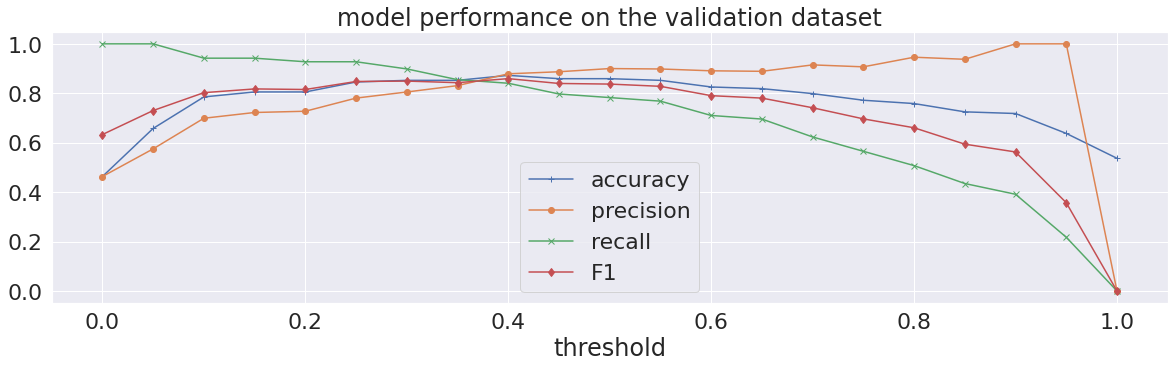

In [38]:
# apply the thresholds function

df_metrics = tune_threshold(y_val, y_pred, 21)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall','F1'], 
                title='model performance on the validation dataset',
                kind="line",  style=['+-', 'o-', 'x-', 'd-'], figsize=(20, 5));

print('the ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

Como dijimos, con el umbral de decisión igual a cero no obtenemos Falsos Negativos:

<blockquote>
    <p>t = 0   ---->  recall = 1  ---->  true pos / true pos = 1  ---->  
        true pos = true pos  ---->  true pos = true pos + false neg ---->  false neg = 0</p>
</blockquote>


pero tenemos tantos Verdaderos Positives como Falsos Positivos:

<blockquote>
    <p>t = 0  ---->  precision ~ 0.5  ---->  true pos / (true pos + false pos) ~ 0.5  ---->  true pos ~ false pos </p>
</blockquote>

Por otro lado, cuando la 'recall' and y la precisión son similares (en nuestro caso eso ocurre con t ~ 0.35):
<blockquote>
    <p>
recall ~ precision  ---->  true pos / (true pos + false neg) ~ true pos / (true pos + false pos)  ---->  false neg ~ false pos </p>
</blockquote>

Intentamos evitar tantos Falsos Negativos como sea posible pero sin aumentar demasiado los Falsos Positivos, luego establecemos el umbral en `t = 0.4`, porque es uno de los valores que maximizan F1-score y veremos más adelante que es un umbral que podemos usar en otros modelos:

In [39]:
df_metrics[df_metrics.F1.round(1) == max(df_metrics.F1.round(1))].round(3) 

,threshold,accuracy,precision,recall,F1
8,0.4,0.872,0.879,0.841,0.859


In [40]:
# define the function that calculates and compares the train and val metrics and 
# stores the val metrics for the section where we select the best model

def calc_val_metrics(model, X_train, y_train, X_val, y_val, y_pred, t):
    
    val_metrics = []
    
    # TRAIN
    y_pred = model.predict_proba(X_train)[:, 1]
    acc = accuracy_score(y_train, y_pred >= t) 
    f1 = f1_score(y_train, y_pred>=t)
    rec = recall_score(y_train, y_pred >= t)
    auc = roc_auc_score(y_train, y_pred)
    print('For the training dataset:',
            'ACC:', acc.round(3),'F1:', f1.round(3), 'recall:', rec.round(3), 'ROC AUC:', auc.round(3))   
    
    # VAL
    y_pred = model.predict_proba(X_val)[:, 1]
    val_acc = accuracy_score(y_val, y_pred >= t) 
    val_f1 =  f1_score(y_val, y_pred>=t)
    val_rec = recall_score(y_val, y_pred >= t)
    val_auc = roc_auc_score(y_val, y_pred)
    
    val_metrics.append((val_acc, val_f1, val_rec, val_auc))
        
    print('For the validation dataset:',
        'ACC:', val_acc.round(3), 'F1:', val_f1.round(3), 'recall:', val_rec.round(3), 'ROC AUC:', val_auc.round(3))
    
    return val_metrics

In [41]:
LR_val_metrics = calc_val_metrics(LR, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.866 F1: 0.863 recall: 0.909 ROC AUC: 0.935
For the validation dataset: ACC: 0.872 F1: 0.859 recall: 0.841 ROC AUC: 0.932


Los rendimientos del modelo en los conjuntos de datos de entrenamiento y validación son similares (por lo tanto, no hay sobreajuste o 'overfitting' y el modelo generaliza bien) y las puntuaciones de las métricas son buenas. 

##### Matriz de confusión

Nos ayuda a visualizar el número de Verdaderos Positivos, Verdaderos Negativos, Falsos Positivos y Falsos Negativos en la matriz de los valores reales y los valores predichos.

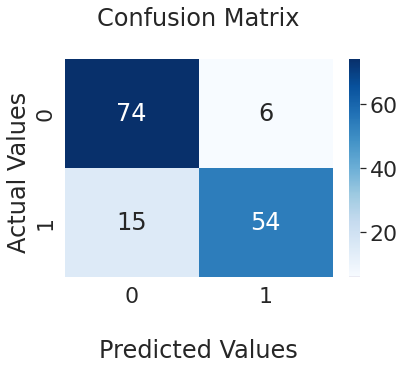

In [42]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_val, y_pred >= t)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

Con una regresión logística, nuestro modelo de referencia inicial, con umbral de decisión `t = 0.4` obtenemos 15 Falsos Negativos (no es muy bueno) y 6 Falsos Positivos (falsas alarmas).

En lugar de ajustar intentar tunear otros hiperparámetros del modelo de regresión logística vamos a probar con algunos modelos no lineales que quizá reconozcan mejor la relación entre las características o 'features' y la variable objetivo o 'target'.

<a name='model-DT'/>

### <font color=#ac6240>4.2 Decision Tree Classifier (árbol de decisiones de clasificación)</font>

Los árboles de decisión aprenden reglas 'if-then-else' a partir de datos en los que encontrar la mejor división (verdadero o falso en la condición) significa seleccionar la división más informativa (también llamada menos 'impura'). Cada división crea dos ramas y la última condición 'if' de una rama es llamar una 'leaf' (hoja). Es interpretable, lo cual es bueno, pero fácilmente se sobreajustan ('overfitting'). Pueden usarse para resolver problemas de regresión o de clasificación. En Scikit-learn, lo controlamos limitando los hiperparámetros: 
+ `max_depth` cuántas veces se puede dividir una rama, y 
+ `min_samples_leaf`, el tamaño del grupo final sin dividir. 

Ver la [documentación oficial](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) para obtener explicaciones exhaustivas. Ahora ajustamos los hiperparámetros del árbol usando la métrica 'recall' y luego encontramos el mejor umbral de decision. Con suerte mejoramos los resultados del modelo de referencia inicial de la sección anterior.

In [43]:
#%%timeit  # this cells takes some seconds to run

# parameters
max_depth = [4, 5, 6]
min_samples_leaf = [1, 5, 10, 15, 20, 500, 100, 200]
DT_param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf)

# metric
metric = make_scorer(f1_score)

# grid
DT_grid = GridSearchCV(
            estimator = DecisionTreeClassifier(random_state = 1), 
            param_grid = DT_param_grid, 
            n_jobs= -1, 
            scoring = metric,
            verbose = 1)

# train the model
DT_grid_results = DT_grid.fit(X_train, y_train)

# summarize
print('Mean F1-score: %.3f' % DT_grid.best_score_)
print('Standar Deviation:', DT_grid.cv_results_['std_test_score'][DT_grid.best_index_].round(3))
print('Best Parameters: %s' % DT_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mean F1-score: 0.823
Standar Deviation: 0.02
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5}


In [44]:
# train the model with the best hiperparameters
DT = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, random_state = 1)
DT.fit(X_train, y_train)
y_pred = DT.predict_proba(X_val)[:, 1]

the ROC AUC is 0.915


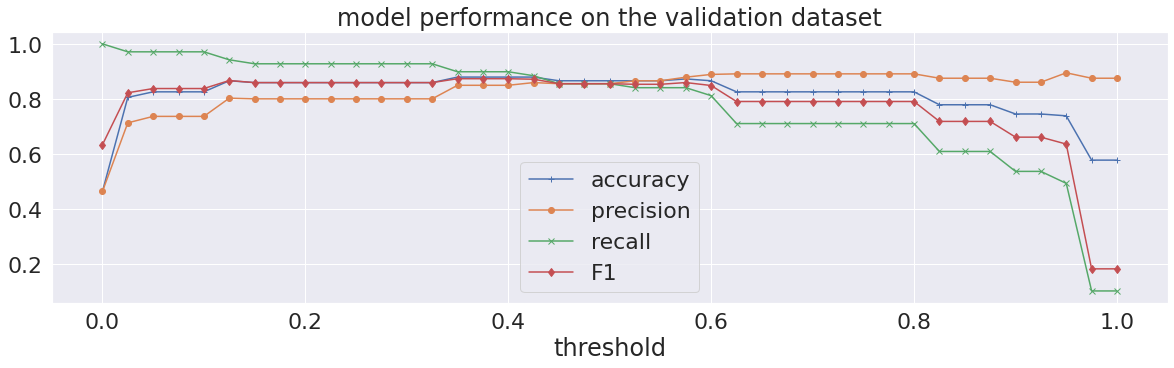

In [45]:
# apply the thresholds function

df_metrics = tune_threshold(y_val, y_pred, 41)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall','F1'], 
                title='model performance on the validation dataset',
                kind="line",  style=['+-', 'o-', 'x-', 'd-'], figsize=(20, 5));

print('the ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()    

In [46]:
df_metrics[df_metrics.F1.round(3) == max(df_metrics.F1.round(3))].round(3) 

,threshold,accuracy,precision,recall,F1
14,0.350,0.879,0.849,0.899,0.873
15,0.375,0.879,0.849,0.899,0.873
16,0.400,0.879,0.849,0.899,0.873


El umbral `t = 0.4` maximiza 'F1-score' como en la regresión logística, nuestro modelo de referencia, usaremos ese umbral de ahora en adelante. 

In [47]:
t = 0.4
DT_val_metrics = calc_val_metrics(DT, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.893 F1: 0.89 recall: 0.938 ROC AUC: 0.965
For the validation dataset: ACC: 0.879 F1: 0.873 recall: 0.899 ROC AUC: 0.915


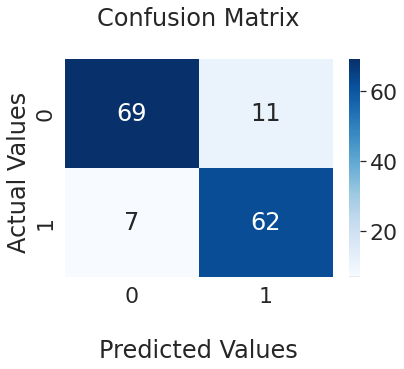

In [48]:
cf_matrix = confusion_matrix(y_val, y_pred >= t)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

El árbol de decisión con umbral `t = 0.4` nos da 7 Falsos Negativos, 8 menos que el modelo de referencia,  la regresión logística, pero una 'F1-score' en validacion de 0.873, es decir  ~0.014 puntos menor. Las métricas de entrenamiento y validación están un poco separadas así que hay riesgo de 'overfitting'. Veamos cómo son las hojas y las ramas de nuesto árbol:

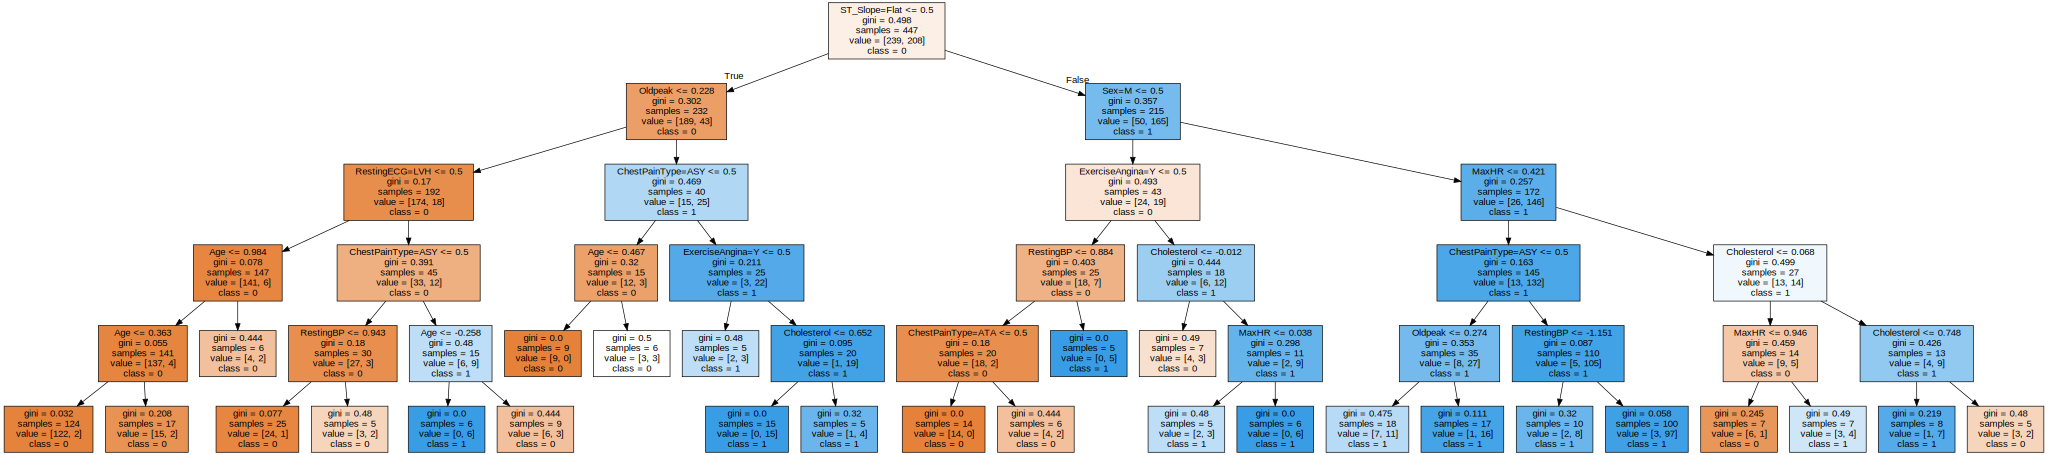

In [49]:
# prepare the data in the 'dot' format
feature_names = numerical + categorical_update
dot_data = tree.export_graphviz(DT, out_file = None, 
                                feature_names = feature_names,  
                                class_names = ['0','1'],  
                                # leaves with False for Heart Disease are in orange, 
                                # leaves with True for Heart Disease in blue         
                                filled = True)
# plot the tree
graph = graphviz.Source(dot_data, format = "png") 
graph

<font size="5">🤩</font>

Es genial que los árboles de decisión sean interpretables, mirando sus hojas y sus ramas podemos entender cómo se hacen las predicciones. Las hojas con hijas muestran el criterio de separación en la primera línea de su rectángulo, que es azulado para las hojas con 'target' igual a 1 (pacientes con riesgo de sufrir fallo cardiaco) y es anaranjado para las hojas con 'target' igual a 0 (pacientes sanxs). Si deseamos clasificar a unx nuevx paciente, comenzaremos en el nodo raíz, arriba del todo (profundidad 0). Este nodo preguntará cuál es el valor de la función 'ST_Slope = Flat' para esx paciente. Si `ST_Slope = Flat <= 0.5` avanzamos hacia la rama izquierda (profundidad 1) y así sucesivamente navegamos por las hojas. 

Los valores llamados 'value' entre corchetes muestran cuántos valores de la 'target' (aqui llamada 'class') tiene esa hoja del árbol (primero el número de datos Falsos y luego los Verdaderos). Para comprender mejor los atributos, ver [este artículo](https://www.datacourses.com/decision-trees-in-sci-kit-learn-1261/) y para la impureza de Gini, ver, por ejemplo, este [Vídeo de Luis Serrano](https://youtu.be/u4IxOk2ijSs).

Vemos que el árbol también eligió 'ST_Slope', 'Oldpeak', y 'Sex' como características relevantes, como verificamos en la sección <a href=#eda-fi>2.3 Feature importance y análisis de la variable 'target'</a> donde concluimos que 'Oldpeak, y 'MaxHR' eran las características numéricas más relevantes y 'ST_Slope', 'ExerciseAngina' y 'ChestPainType' las características categóricas más relevantes.

<a name='model-RF'/>

### <font color=#ac6240>4.3 Random Forest (bosque aleatorio)</font>

Probemos un tipo de [Ensemble Learning](https://en.wikipedia.org/wiki/Ensemble_learning): corramos en paralelo muchos árboles y tomemos la predicción del que obtuvo más aciertos. Primero, se crean múltiples conjuntos de datos de entrenamiento mediante el muestreo de datos del conjunto de datos de entrenamiento (un método conocido como 'bootstrapping' o 'bagging') y luego se entrena un árbol de decisión en cada uno de estos conjuntos de datos.  Pueden usarse para resolver problemas de regresión o de clasificación. Por lo general, los bosques aleatorios tienen un alto rendimiento, pero no son interpretables ('black-boxes') y no son recomendables para grandes conjuntos de datos (~ TB) porque requieren mucha más potencia de computadora que los métodos que usamos aquí antes.

Como anteriormente, calibraremos los hiperparámetros automáticamente usando el paquete Scikit-learn `GridSearchCV`, que probará programáticamente todas las permutaciones de una cuadrícula de hiperparámetros:

+ `n_estimators`: numero de árboles en el bosque, y

como en el árbol de decion anterior:
+ `max_depth` cuántas veces se puede dividir una rama, y 
+ `min_samples_leaf`, el tamaño del grupo final sin dividir.

In [50]:
#%%timeit  # this cells takes some seconds to run

# parameters
n_estimators = [50, 100, 150]
max_depth = [5, 10]
min_samples_leaf = [5, 10]

RF_param_grid = dict(max_depth = max_depth, min_samples_leaf = min_samples_leaf, n_estimators = n_estimators)

# model
RF = RandomForestClassifier(max_depth = max_depth, 
                            min_samples_leaf = min_samples_leaf, 
                            n_estimators = n_estimators, 
                            random_state = 1)

# metric
metric = make_scorer(f1_score)

# grid
RF_grid = GridSearchCV(
        estimator = RF, 
        param_grid = RF_param_grid,  
        scoring = metric, 
        verbose =1)

# train the model
RF_grid_results = RF_grid.fit(X_train, y_train)

# summarize
print('Mean F1-score: %.3f' % RF_grid.best_score_)
print('Standar Deviation:', RF_grid.cv_results_['std_test_score'][RF_grid.best_index_].round(3))
print('Best Parameters: %s' % RF_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean F1-score: 0.861
Standar Deviation: 0.025
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 150}


In [51]:
# let us extract the best random forest and apply it to the validation set

best_RF = RF_grid_results.best_estimator_
y_pred = best_RF.predict_proba(X_val)[:, 1]

the ROC AUC is 0.943


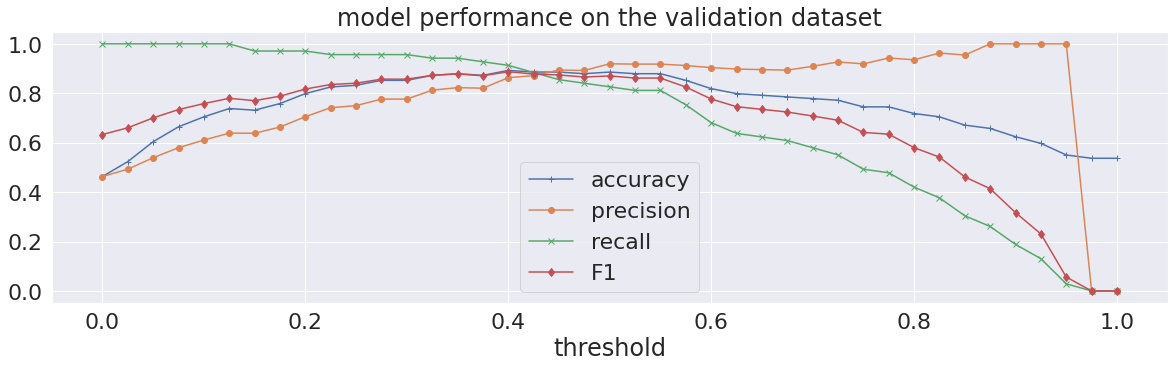

In [52]:
# apply the thresholds function

df_metrics = tune_threshold(y_val, y_pred, 41)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall','F1'], 
                title='model performance on the validation dataset',
                kind="line",  style=['+-', 'o-', 'x-', 'd-'], figsize=(20, 5));

print('the ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()   

In [53]:
df_metrics[df_metrics.F1.round(3) == max(df_metrics.F1.round(3))].round(3) 

,threshold,accuracy,precision,recall,F1
16,0.4,0.893,0.863,0.913,0.887


In [54]:
# we choose the threshold bcs it maximizes F1-score
t = 0.4

In [55]:
RF_val_metrics = calc_val_metrics(best_RF, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.893 F1: 0.892 recall: 0.957 ROC AUC: 0.972
For the validation dataset: ACC: 0.893 F1: 0.887 recall: 0.913 ROC AUC: 0.943


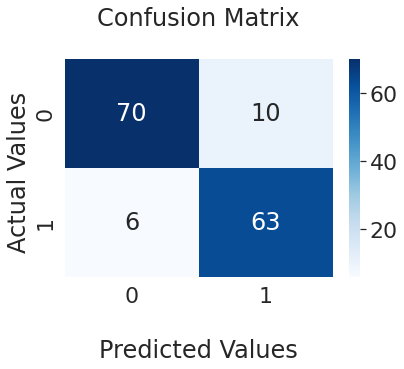

In [56]:
t=0.4
cf_matrix = confusion_matrix(y_val, y_pred >= t)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

En comparación con nuestro modelo de referencia, la regresión logística, el random forest muestra menos Falsos Negativos (se redujo su número a más la mitad) y un valor de la métrica 'F1-score' un poco mayor, ~0.03, respecto al modelo 'baseline', lo cual es un buen resultado. Ademas, los rendimientos sobre los conjunto de entrenamiento y validación no son muy similares (hay riesgo de sobreajuste).

<blockquote>
    <p><font color=#FF801A size="3"> Pregunta 2: </font> Usamos la métrica `F1` para seleccionar los mejores parámetros del Random Forest. ¿Cambiar la métrica de 'F1' a 'precisión' reduciría el número de resultados Falsos Negativos? Compruébalo cambiando 'metric = make _anotador (f1_ score)' a 'metric = make _anotador (precisión_ score)', selecciona el nuevo umbral y vuelve a calcular la matriz de confusión. Encuentra la solución al final de este jupyter notebook 🙂.</p>
</blockquote>

En lugar de continuar tuneando el modelo de Random Forest, vamos a probar un enfoque distinto, denominado Boosting Algorithms (también dentro del concepto de [Ensemble Learning](https://en.wikipedia.org/wiki/Ensemble_learning)), que implentamos con el paquete `XGBoost`. 

<a name='model-XGB'/>

### <font color=#ac6240>4.4 XGBoost (a gradient-boosted machine)</font>

Vamos a implementar el paquete XGBoost para correr un conjunto o 'ensemble' de árboles de decisión pero secuencialmente (no en paralelo como hacíamos en el modelo de Random Forest). Que los árboles se entrenen uno detrás de otro nos permite que el árbol siguiente aprenda de los errores del árbol anterior. XGBoost es un tipo de gradient-boosted machine, y pueden usarse para resolver problemas de regresión o de clasificación. Seguiremos [esta referencia](https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f) para tunear los hiperparámetros principales:
+ `eta`: la tasa de aprendizaje o 'learning rate', y

como en el árbol de decisión anterior:
+ `max_depth` cuántas veces se puede dividir una rama, y 
+ `min_child_weight`, el tamaño del grupo final sin dividir.

In [57]:
#%%timeit  # this cells takes some seconds to run

# parameters
eta = [0.05, 0.1, 0.3] # default is 0.3
max_depth = [4, 8, 12] # default is 6
min_child_weight = [1, 5, 10] # default is 1

XGB_param_grid = dict(eta = eta, max_depth = max_depth, min_child_weight = min_child_weight)

# model
XGB = xgb.XGBClassifier(eta = eta, max_depth = max_depth,
                        min_child_weight = min_child_weight, 
                        objective = 'binary:logistic', 
                        eval_metric = 'auc')

# metric
metric = make_scorer(f1_score)

# grid
XGB_grid = GridSearchCV(
        estimator = XGB, 
        param_grid = XGB_param_grid, 
        scoring = metric, 
        verbose =1)

# train the model
XGB_grid_results = XGB_grid.fit(X_train, y_train)

# summarize
print('Mean F1-score: %.3f' % XGB_grid.best_score_)
print('Standar Deviation:', XGB_grid.cv_results_['std_test_score'][XGB_grid.best_index_].round(3))
print('Best Parameters: %s' % XGB_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean F1-score: 0.836
Standar Deviation: 0.024
Best Parameters: {'eta': 0.1, 'max_depth': 12, 'min_child_weight': 1}


Los mejores valores de los hiperparámetros son: `eta = 0.1`, `max_depth = 12`, y `min_child_weight = 1` con un rendimiento medio en 'F1-score' de 0.836 muy robusto (hay poca dispersión). Vamos a aplicar estos valores de los hiperparámetros:

In [58]:
# let us extract the best random forest and apply it to the validation set

best_XGB = XGB_grid_results.best_estimator_
y_pred = best_XGB.predict_proba(X_val)[:, 1]

the ROC AUC is 0.952


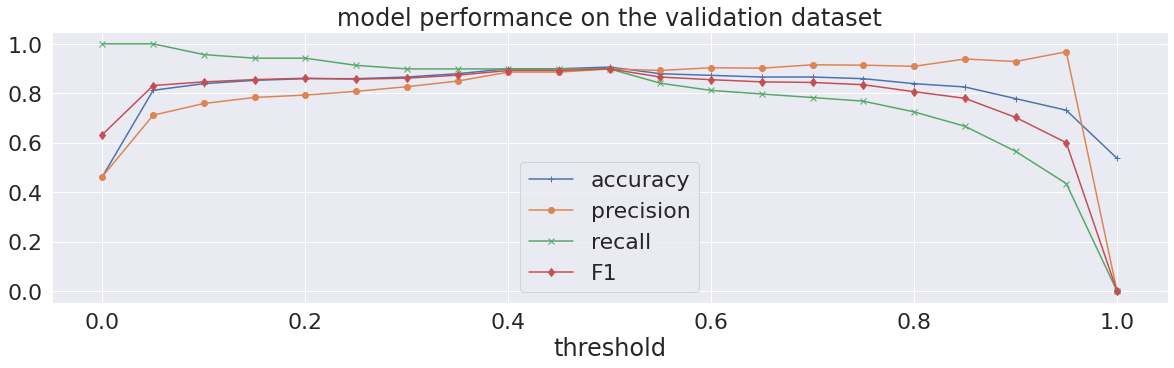

In [59]:
# apply the thresholds function

df_metrics = tune_threshold(y_val, y_pred, 21)
df_metrics.plot(x='threshold', y=['accuracy','precision','recall','F1'], 
                title='model performance on the validation dataset',
                kind="line",  style=['+-', 'o-', 'x-', 'd-'], figsize=(20, 5));

print('the ROC AUC is', roc_auc_score(y_val, y_pred).round(3))

plt.show()

In [60]:
df_metrics[df_metrics.F1.round(1) == max(df_metrics.F1.round(1))].round(3) 

,threshold,accuracy,precision,recall,F1
3,0.15,0.852,0.783,0.942,0.855
4,0.20,0.859,0.793,0.942,0.861
5,0.25,0.859,0.808,0.913,0.857
6,0.30,0.866,0.827,0.899,0.861
7,0.35,0.879,0.849,0.899,0.873
8,0.40,0.899,0.886,0.899,0.892
9,0.45,0.899,0.886,0.899,0.892
10,0.50,0.906,0.899,0.899,0.899
11,0.55,0.879,0.892,0.841,0.866
12,0.60,0.872,0.903,0.812,0.855


A pesar de que no es el valor del máximo 'F1-score', seleccionamos el umbral `t = 0.4` que tiene buenos valores también y es el umbral que usamos en los anteriores modelos.

In [61]:
t = 0.4
XGB_val_metrics = calc_val_metrics(best_XGB, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.996 F1: 0.995 recall: 1.0 ROC AUC: 1.0
For the validation dataset: ACC: 0.899 F1: 0.892 recall: 0.899 ROC AUC: 0.952


Los rendimientos sobre los conjunto de entrenamiento y validación son muy diferentes, y la ROC AUC para el conjunto de entrenamiento es 1, estamos sobreajustando. Podriamos eliminar este 'overfitting' con metodos de regularizacion como droupout, como explicamos el Jupyter Notebook sobre cuantizacion de inceertidumbre que se encuentra en [este repositorio](https://github.com/MMdeCastro/Uncertainty_Quantification_XAI).  Aquí simplemente vamos a reducir la profundidad del árbol y permitir más valores sus hojas finales mediante una exploración:

In [62]:
# parameters ranges
for eta in [0.05, 0.1, 0.3]: # default is 0.3
    for max_depth in [4, 8, 12]: # default is 6
        for min_child_weight in [1,5,10]: # default is 1

            XGB_reg = xgb.XGBClassifier(eta = eta, 
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight, 
                                        objective = 'binary:logistic', 
                                        eval_metric = 'auc')
            # train model 
            XGB_reg.fit(X_train, y_train)

            # apply model
            y_pred = XGB_reg.predict_proba(X_val)[:, 1] 

            # evaluate performance for t = 0.4
            xgb_rec = f1_score(y_val, y_pred >= 0.4)  
            print('F1 =', xgb_rec.round(3), 
                  'eta:', eta, 'max_depth:', 
                  max_depth, 'min_child_weight:', min_child_weight)


F1 = 0.892 eta: 0.05 max_depth: 4 min_child_weight: 1
F1 = 0.871 eta: 0.05 max_depth: 4 min_child_weight: 5
F1 = 0.865 eta: 0.05 max_depth: 4 min_child_weight: 10
F1 = 0.878 eta: 0.05 max_depth: 8 min_child_weight: 1
F1 = 0.871 eta: 0.05 max_depth: 8 min_child_weight: 5
F1 = 0.865 eta: 0.05 max_depth: 8 min_child_weight: 10
F1 = 0.879 eta: 0.05 max_depth: 12 min_child_weight: 1
F1 = 0.871 eta: 0.05 max_depth: 12 min_child_weight: 5
F1 = 0.865 eta: 0.05 max_depth: 12 min_child_weight: 10
F1 = 0.884 eta: 0.1 max_depth: 4 min_child_weight: 1
F1 = 0.865 eta: 0.1 max_depth: 4 min_child_weight: 5
F1 = 0.855 eta: 0.1 max_depth: 4 min_child_weight: 10
F1 = 0.884 eta: 0.1 max_depth: 8 min_child_weight: 1
F1 = 0.871 eta: 0.1 max_depth: 8 min_child_weight: 5
F1 = 0.855 eta: 0.1 max_depth: 8 min_child_weight: 10
F1 = 0.892 eta: 0.1 max_depth: 12 min_child_weight: 1
F1 = 0.871 eta: 0.1 max_depth: 12 min_child_weight: 5
F1 = 0.855 eta: 0.1 max_depth: 12 min_child_weight: 10
F1 = 0.884 eta: 0.3 max_d

Escogemos el conjunto de hiperparametros: `eta = 0.1`, `max_depth = 4` y `min_child_weight = 10` que nos dan una `F1 = 0.855` porque después de correr la celda siguiente con varios conjuntos de hiperparámetros vemos que este produce la menor separación entre los valores de las métricas de entrenamiento y validación:

In [63]:
XGB_reg = xgb.XGBClassifier(eta = 0.1, max_depth = 4, min_child_weight = 10, 
                            objective = 'binary:logistic', 
                            eval_metric = 'auc')
XGB_reg.fit(X_train, y_train)
y_pred = XGB_reg.predict_proba(X_val)[:, 1] 
XGB_reg_val_metrics = calc_val_metrics(XGB_reg, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.881 F1: 0.879 recall: 0.923 ROC AUC: 0.958
For the validation dataset: ACC: 0.866 F1: 0.855 recall: 0.855 ROC AUC: 0.943


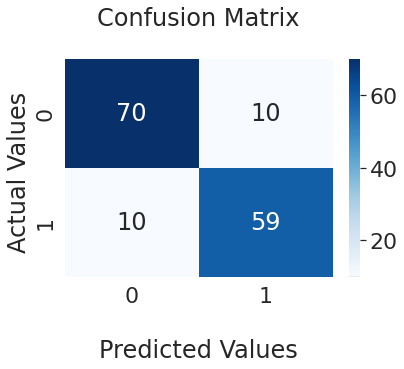

In [64]:
t = 0.4
cf_matrix = confusion_matrix(y_val, y_pred >= t)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

Obtenemos 5 Falsos Negativos menos que con el modelo 'baseline' y una F1-score 0.004 puntos menor pero no estamos sobreajustando <font size="5"> 👍🤓</font>.

XGBoost nos permite ver las caraterísticas o 'features' que ha considerado como más importantes para llevar a cabo esta tarea de clasificación de la variable objetivo 'HeartDesease':

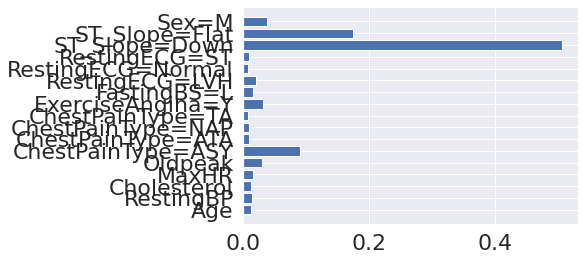

In [65]:
plt.barh(feature_names, best_XGB.feature_importances_)
plt.rcParams['figure.figsize'] = [25, 10]
plt.show()
# to get a nice figure size, run this cell twice

Vemos que el XGBoost también eligió 'ST_Slope=UP' (como el árbol de decisión) y 'ExerciseAngina=N' como características relevantes para predecir la variable objetivo 'HeartDisease'. Recordamos que en la sección <a href=#eda-fi>2.3 Feature importance y análisis de la variable 'target'</a> concluimos que 'Oldpeak, y 'MaxHR' eran las características numéricas más relevantes y 'ST_Slope', 'ExerciseAngina' y 'ChestPainType' las características categóricas más relevantes.

<a name='model-select'/>

### <font color=#ac6240>4.5 Selección del modelo ganador</font>

Elegiremos y probaremos el modelo final. Recordemos el rendimiento de los modelos sobre el conjunto de validación:

In [66]:
print('Model performance on the validation dataset:')

df_metrics_metric = pd.DataFrame(['acc', 'F1', 'recall', 'ROC_AUC'])
df_metrics_LR = pd.DataFrame(LR_val_metrics).round(3).T
df_metrics_DT = pd.DataFrame(DT_val_metrics).round(3).T
df_metrics_RF = pd.DataFrame(RF_val_metrics).round(3).T
df_metrics_XGB = pd.DataFrame(XGB_val_metrics).round(3).T

df_final_val_metrics = pd.concat([df_metrics_metric, df_metrics_LR, 
                              df_metrics_DT, df_metrics_RF, df_metrics_XGB], axis=1)
df_final_val_metrics.columns = ['metric', 'LR', 'DT', 'RF', 'XGB']
df_final_val_metrics.set_index('metric')

Model performance on the validation dataset:


,LR,DT,RF,XGB
metric,,,,
acc,0.872,0.879,0.893,0.899
F1,0.859,0.873,0.887,0.892
recall,0.841,0.899,0.913,0.899
ROC_AUC,0.932,0.915,0.943,0.952


Parece que el modelo de XGBoost obtuvo los mejores valores en todas las métricas sobre el conjunto de datos de validación menos en 'recall', que gana el bosque aleatorio. Veamos cómo se comportan los modelos en validaciones cruzadas sobre el conjunto de entrenamiento. 

#### <font color=#ac6240>4.4.1 Verificar la estabilidad del modelo con k-fold cross-validation</font>

Vamos a tratar de comprobar si estos resultados son estables agregando una especie de intervalos de confianza alrededor de las puntuaciones de desempeño en forma de desviación estándar. Como hicimos en en el sección <a href=#model-LG>4.1 Modelo de referencia inicial para la selección de la métrica: Regresión Logística)</a> usamos una validación cruzada de k pliegues sobre los datos del conjunto de entrenamiento y tomamos la media y la desviación estándar de los resultados de los pliegues. No usamos la funcion `GridSearchCV` porque no estamos tuneando hiperparametros, solo queremos la validacion cruzada, así que usamos la función `cross_val_score` (donde no podremos establecer el umbral `t = 0.4`, el de defecto es `t = 0.5`, pero no importa porque queremos comparar modelos, mientras tengan el mismo umbral nos sirve):

In [67]:
models = [] 

# we programatically tuned the main parameters of these models:
models.append(('LR', LogisticRegression(max_iter = 50, random_state = 1)))
models.append(('DT', DecisionTreeClassifier(max_depth = 5, 
                                            min_samples_leaf = 5, random_state = 1)))
models.append(('RF', RandomForestClassifier(max_depth = 10, 
                                            min_samples_leaf = 5, 
                                            n_estimators =  50, random_state = 1)))
models.append(('XGB', xgb.XGBClassifier(eta = 0.1, max_depth = 4,
                                        min_child_weight = 10, 
                                        objective = 'binary:logistic', 
                                        eval_metric = 'auc')))

results = []
names = []
metric = make_scorer(f1_score) # try recall_score if you like

print("The mean and std of F1-score for the 10-folds cross-validation on the training set:")
print()

for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= metric)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean().round(3), '+-', cv_results.std().round(3))

The mean and std of F1-score for the 10-folds cross-validation on the training set:

LR 0.846 +- 0.042
DT 0.768 +- 0.087
RF 0.837 +- 0.058
XGB 0.837 +- 0.058


Todos los valores de F1-score son muy similares menos los del árbol de decisión que son un poco más bajos y todos muestran poca dispersión. 

Para decidirnos por uno, miramos la métrica de 'recall' sobre el conjunto de validación, que era un mejor para el bosque aleatorio (recordamos que a mayor 'recall', menos Falsos Negativos, que son los resultados que intentamos evitar). Por desgracia el bosque aleatorio no es un modelo interpretable, por lo que sus predicciones sobre lxs pacientes no se pueden rastrear si lo aplicamos en el mundo real. Si este proyecto fuera a llevarse a producción, sería más conveniente elegir la regresión logística que también desempeñó muy favorablemente y es un modelo interpretable (ver Jupyter Notebook en [este repositorio](https://github.com/MMdeCastro/Uncertainty_Quantification_XAI) sobre explicabilidad para mas detalles).

<font size="5"> 🏅 </font> Finalmente, seleccionamos al bosque aleatorio como el mejor clasificador para el Proyecto de Predicción de Enfermedades Cardíacas.

<font color=#6B8E23 size="4"> Observación importante </font>

La valoración cruzada no es un método riguroso, ya que:
+ es difícil saber si la diferencia entre las puntuaciones medias de las habilidades es real o el resultado de una casualidad estadística, y 
+ al utilizar la media y la desviación estándar los resultados de los entrenamientos sobre los k pliegues como un resumen de las habilidades de los modelos, estamos asumiendo una distribución gaussiana para la población de los resultados de los entrenamientos sobre los k pliegues, lo cual no es necesariamente correcto. 

Además, los métodos habituales de prueba de hipótesis fallarán porque las métricas de los resultados de k-fold no son independientes. Hay formas de solucionar este problema, como utilizar una prueba t de Student modificada. Encuentra más información [aquí](https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/) y [aquí](https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/).

Un método riguroso para añadir intervalos de confianza a las predicciones puntuales es el de los Conformal Predictors, implementados en Python por ejemplo en el paquete [`MAPIE`](https://mapie.readthedocs.io). 

En la documentación oficial de [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) dice que es posible obtener p-values e intervalos de confianza para los coeficientes del algoritmo de la regresion logistica sin penalización con el paquete [statsmodels](<https://pypi.org/project/statsmodels/>) o usando bootstrapping en Scikit-learn.

En [este repositorio](https://github.com/MMdeCastro/Uncertainty_Quantification_XAI) encontraras varios Jupyter Notebooks sobre cómo evaluar la incertidumbre en machine learning.

#### <font color=#ac6240>4.4.3 Prueba del modelo</font>

Iniciamos la fase de prueba ('test'). Entrenamos el modelo ganador con la unión de los conjuntos de datos de entrenamiento y validación (cuantos más datos, mejor). El conjunto de datos resultante se llama "full_train":

In [186]:
# TRAIN
df_full_train = df_full_train.reset_index(drop=True) # reset index after splitting shuffling
y_full_train = df_full_train.HeartDisease.values

# 1. encode the categorical features and remove redundant columns -----------------

full_train_dict = df_full_train[categorical].to_dict(orient='records')
X_full_train_cat = dv.fit_transform(full_train_dict) 

# convert the data array to a dataframe
df_X_full_train_cat = pd.DataFrame(X_full_train_cat,columns= dv.get_feature_names())

# remove redundant columns
df_X_full_train_cat.drop(['ExerciseAngina=N', 'FastingBS=H', 'Sex=F', 'ST_Slope=Up'], 
                    axis=1, inplace=True)

# convert the dataframe to a np.array again
X_full_train_cat = df_X_full_train_cat.to_numpy()

# 2. scale the numerical features ---------------------------------------------------

X_full_train_num = df_full_train[numerical].values
X_full_train_num = scaler.fit_transform(X_full_train_num) 

# 3. join the matrices --------------------------------------------------------------

X_full_train = np.column_stack([X_full_train_num, X_full_train_cat]) 

y con el conjunto de prueba:

In [187]:
# TEST
df_test = df_test.reset_index(drop=True) # reset index after splitting shuffling
y_test = df_test.HeartDisease.values

del df_test['HeartDisease'] # remove target
    
# 1. encode the categorical features and remove redundant columns-------------    

test_dict = df_test[categorical].to_dict(orient='records')
X_test_cat = dv.transform(test_dict) 

# convert the data array to a dataframe
df_X_test_cat = pd.DataFrame(X_test_cat,columns= dv.get_feature_names())

# remove redundant columns
df_X_test_cat.drop(['ExerciseAngina=N', 'FastingBS=H', 'Sex=F', 'ST_Slope=Up'], 
                    axis=1, inplace=True)

# convert the dataframe to a np.array again
X_test_cat = df_X_test_cat.to_numpy()

# 2. scale the numerical features --------------------------------------------

X_test_num = df_test[numerical].values
X_test_num = scaler.transform(X_test_num) 

# 3. join the matrices -------------------------------------------------------

X_test = np.column_stack([X_test_num, X_test_cat]) 

In [196]:
# train and apply the final model:

RF = RandomForestClassifier(max_depth = 10, min_samples_leaf = 5,
                            n_estimators =  50, random_state = 1)

model = RF.fit(X_full_train, y_full_train)
y_pred = RF.predict_proba(X_test)[:, 1]

t = 0.4

acc = accuracy_score(y_test, y_pred >= t) 
rec = recall_score(y_test, y_pred >= t)
f1  = f1_score(y_test, y_pred >= t) 
auc = roc_auc_score(y_test, y_pred)
print('For the test dataset:',
      'ACC:', acc.round(3), 'F1:', f1.round(3),
      'recall:', rec.round(3),'ROC AUC:', auc.round(3))

For the test dataset: ACC: 0.893 F1: 0.901 recall: 0.924 ROC AUC: 0.942


Vemos que no tenemos motivos para esperar que el modelo no generalice bien porque no hay sobreajuste: estos valores son similares a los valores de las métricas que obtuvimos cuando aplicamos el modelo sobre los conjuntos de entrenamiento y validación:

In [197]:
RF_val_metrics = calc_val_metrics(best_RF, X_train, y_train, X_val, y_val, y_pred, t=0.4)

For the training dataset: ACC: 0.893 F1: 0.892 recall: 0.957 ROC AUC: 0.972
For the validation dataset: ACC: 0.893 F1: 0.887 recall: 0.913 ROC AUC: 0.943


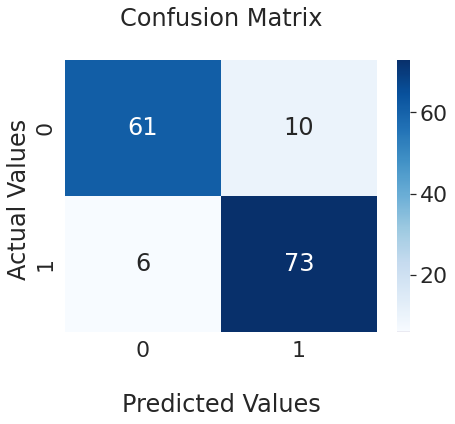

In [198]:
cf_matrix = confusion_matrix(y_test, y_pred >= t)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

##plt.figure(figsize=(7,5))
plt.rcParams['figure.figsize'] = [7, 5]  # re-run this cell to get the correct figure size

plt.show();

<font size="5"> 👏 </font> Hemos obtenido 6 Falsos Negativos con el bosque aleatorio sobre el conjunto de prueba.

<blockquote>
    <p><font color=#FF801A size="3"> Pregunta 3: </font> Para obtener 0 resultados Falsos Negativos, ¿cuántas falsas alarmas deberíamos aceptar? Cambia el valor de umbral y ejecuta la celda para trazar la matriz de confusión hasta que la encuentre. Encuentra la solución al final de este Jupyter Notebook 🙂.</p>
</blockquote>

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<a name='app'/>

## <font color=#ac6240>5. Aplicación del modelo</font>

Simulemos una nueva paciente con los siguientes datos:

In [199]:
new_patient = {
    'Age': 56,
    'Sex': 'F',
    'ChestPainType': 'ATA', 
    'RestingBP': 130,  
    'Cholesterol': 150, 
    'FastingBS': 'L',
    'RestingECG': 'ST',
    'MaxHR': 115,
    'ExerciseAngina': 'N',
    'Oldpeak': 1.,
    'ST_Slope': 'Flat',
 }

Preparamos los datos de entrada como en la sección <a href=#prep>3. Preparación de datos</a>:

In [200]:
num_dict = dict()
cat_dict = dict()
    
for (key, value) in new_patient.items():
    if key in numerical:
        num_dict[key] = value
    else:
        cat_dict[key] = value

# DictVect input must be a dict
X_cat = dv.transform(cat_dict) # encode the categorical features
df_X_cat = pd.DataFrame(X_cat,columns= dv.get_feature_names()) # convert array to df
df_X_cat.drop(['ExerciseAngina=N', 'FastingBS=H', 'Sex=F', 'ST_Slope=Up'], 
              axis=1, inplace=True) # remove redundant columns
X_cat = df_X_cat.to_numpy() # convert the dataframe to a np.array again

# Scaler input must be a np.array
X_num = np.array(list(num_dict.values())).reshape(1, -1)
X_num = scaler.transform(X_num) # scale the numerical features

# Join both arrays
X = np.column_stack([X_num, X_cat]) 

y aplicamos el modelo:

In [201]:
print()
y_pred = RF.predict_proba(X)[:, 1]
print('Model application to new patient:')
print()
print("The patient raw score of suffering a hear failure is:", y_pred[0].round(2))
print()
print("With t =", t, "as the decision threshold, is there a risk of suffering a heart failure?", y_pred[0] >= t)


Model application to new patient:

The patient raw score of suffering a hear failure is: 0.32

With t = 0.4 as the decision threshold, is there a risk of suffering a heart failure? False


<blockquote>
    <p><font color=#FF801A size="3"> Pregunta 4: </font> Aplica el modelo para clasificar a otra paciente que sufre de dolor torácico tipo 'ASY' y angina inducida por el ejercicio. ¿Existe riesgo de que sufra una insuficiencia cardíaca? Encuentre la solución justo después de esta sección 🙂.</p>
</blockquote>

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<a name='sol'/>

## <font color=#ac6240>Soluciones a las preguntas</font>

+ Pregunta 1: la tercera imagen de la izquierda representa un resultado Falso Negativo, generalmente el tipo de error que más queremos prevenir
+ Pregunta 2: no, los cambios no son grandes si se usa 'precisión' en lugar de 'f1', todas las métricas muestran resultados similares en este caso.
+ Pregunta 3: estableciendo el umbral de decisión en `t = 0.1`, no obtenemos ningún resultado de Falsos Negativos, pero obtenemos 43 resultados de falsos Positivos (falsas alarmas).
+ Pregunta 4: desafortunadamente, es cierto.

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<a name='next'/>

## <font color=#ac6240>Siguientes pasos</font>

No hay tiempo para más, las próximas sesiones podrían cubrir los siguientes temas:

+ añadir intervalos de confianza a las predicciones usando Conformal Predictors con la librería `MAPIE` como indica [aqui](https://towardsdatascience.com/mapie-explained-exactly-how-you-wished-someone-explained-to-you-78fb8ce81ff3), 

+ incluir algoritmos de explicabilidad (como se mencion en la sección <a href=#model-LG>4.1 Modelo de referencia inicial para la selección de métricas: Regresión Logística</a>) como [SHAP](https://shap.readthedocs.io/en/latest/) o [LIME](https://github.com/marcotcr/lime),

+ incluir un modelo de aprendizaje no supervisado, como `KMeans`, para agrupar a lxs pacientes en grupos de riesgo,

+ combinar las dos ultimas ideas como en [_'Identifying high risk groups usings SHAP values on healthcare data'_](https://towardsdatascience.com/identifying-high-risk-groups-using-shap-values-on-healthcare-data-e3e7198f30f6),

+ incluir detección de outliers como en [este ejemplo](https://koaning.io/posts/outliers-selection-vs-detection/) o con el paquete `GaussianMixture` como en [este ejemplo](https://koaning.io/posts/high-on-probability-low-on-certainty/),

+ ver como se comporta el model si hay data shift añadiendo ruido a los datos y chequeando la performance como se explica en [este articulo](https://koaning.io/posts/enjoy-the-silence/),

+ mejorar el flujo de trabajo y añadir integración continua con `pipeline` y `Pytest` (ver [este ejemplo](https://calmcode.io/pytest/introduction.html)),

+ desplegar el modelo en una aplicación web con `Flask` en un contenedor `Docker` (ver el README.md del Heart Failure Project en esta [carpeta Github](https://github.com/MMdeCastro/ml-zoomcamp)). 

<a href=#toc>Subir a Tabla de Contenidos</a><br>

<font size="5">☀️⛱️ </font> Hasta pronto!